# Data Visualization
let's practice what we have learned so far and visualize some data!

In order to validate this checkpoint you are asked to accomplish the following tasks:

Preprocessing phase.
After importing the dataset using Pandas start by showing the head of the dataset then some general information about the data columns and values.

As a next step, apply what you have learned in the course to preprocess your data: find missing information and replace it with the appropriate values.

Verify that your data is ready to be treated.

2. Visualization phase:

Let’s begin now with the data visualization phase: 

Start by studying the distribution of the most important features based on your understanding of the dataset and the problem.

Visualize the correlation between Sex and Age in a plot of your choosing. The visualized plot should give us obvious deductions concerning the importance of age and sex in the survival of the individuals.

Pick two other features and study their impact on the survival of the individuals.

Have a look at this function:

def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

Try running the function, analyze what it does exactly and its utilities and finally, write a paragraph describing your analysis (the paragraph should be in English).

Use the groupby function combined with the mean() to view the relation between Pclass and survived 

As a final step try to drop the useless columns such as Names

In fact, we dropped the column Names because we evaluated it to be useless. Well that's not the case because we can create a very useful feature from the names.

Your task now is to create a new column called Title which contains the appropriate Title for each individual ( hint: extract the title from the column Names)

Visualize the correlation between Title and other features(e.g Sex, Fare, Age...)

As you have seen, there are a lot of titles which make the feature very impractical, let's try to group these titles into more useful ones.

hint: use the following dictionary

Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer”,

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty"

                  "the Countess": "Royalty",

                    "Dona":       "Royalty”,

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs

                    "Master" :    "Master"

                    }

let's visualize the same correlations using these new titles now.

Finally, use the Parch and the SibSp columns to create a more useful feature, let's call it FamilySize.

Use what you have learned so far to conclude if this feature is useful or not.

# Preprocessing Part

In [1]:
# Preprocessing phase.
import pandas as pd
Titanic = pd.read_csv("data/titanic-passengers.csv",sep =";")
# Head of the Dataset
Titanic.head()
#Titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
# Some General Infos
Titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [4]:
# Finding the Missing Values
Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
Titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S


In [6]:
# Replace Missing Values
# Number of Age that will be replaced are 177 from 891--> replace
# Replace Missing Age Values with mean() 

print("Age.mean : ",Titanic.Age.mean(),"\nAge.median : ",Titanic.Age.median(),"\nAge.mode : ",Titanic.Age.mode())

Age.mean :  29.69911764705882 
Age.median :  28.0 
Age.mode :  0    24.0
Name: Age, dtype: float64


In [7]:
Titanic.Age.fillna(Titanic.Age.mean(), inplace = True )

In [8]:
Titanic.Age.isnull().sum()

0

In [9]:
# Cabin
#  687 Missing Values from 891  Is it worth replacing at all? --> Remove it
Titanic.Cabin.isnull().sum()

687

In [10]:
Titanic.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C91            1
D45            1
F G63          1
A34            1
E63            1
Name: Cabin, Length: 147, dtype: int64

In [11]:
# --> delate Cabin, because we don't have enough Data
Titanic.drop(["Cabin"],axis = 1 ,inplace = True)
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [12]:
# Embarked
# 2 Missing Value from 891 
# Replace Embarked Missing Value with the most frequent value 
Titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
Titanic.Embarked.fillna("S", inplace =True)

In [14]:
Titanic.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
Titanic.Embarked.isnull().sum()

0

In [16]:
# Dataset after Cleaning
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [17]:
Titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [19]:
# Replacing Categorical to Numerical 
# Label encoder function On Embarked
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Titanic.Embarked =encoder.fit_transform(Titanic.Embarked)
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,2
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,2
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,2
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,2
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,2


In [20]:
Titanic.Embarked.value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [21]:
# Trying the One-hot-encoding On Sex
One_hot = pd.get_dummies(Titanic.Sex)
Data = Titanic
#Data = Titanic.drop("Sex",axis =1)
Data = Data.join(One_hot)
Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,2,0,1
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,2,0,1
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,2,0,1
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,2,1,0
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,0,1,0
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,0,0,1
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,2,1,0
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,2,0,1


In [22]:
# Label encoder function On Sex
Data.Sex = encoder.fit_transform(Data.Sex)
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male
0,343,No,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,2,0,1
1,76,No,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,2,0,1
2,641,No,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,2,0,1
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,2,1,0
4,672,No,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,2,0,1


In [23]:
Titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

# Visualization phase:

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

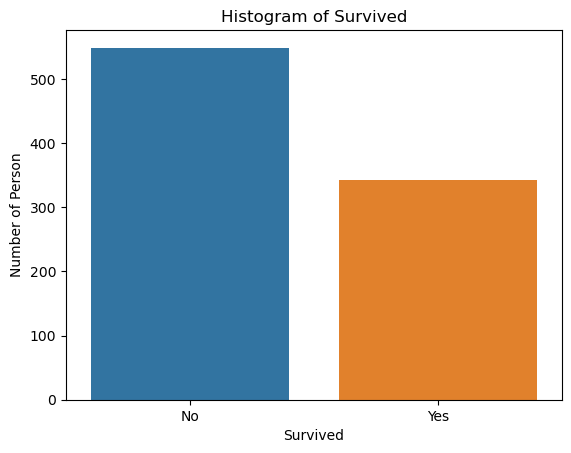

In [24]:
#Start by studying the distribution of the most important features based on your understanding of the dataset and the problem.
# Survived
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.countplot(x = "Survived", data = Titanic)
plt.xlabel("Survived")
plt.ylabel("Number of Person")
plt.title("Histogram of Survived")
plt.xticks( rotation = 0 ) 

Text(4.944444444444445, 0.5, 'Number of Person')

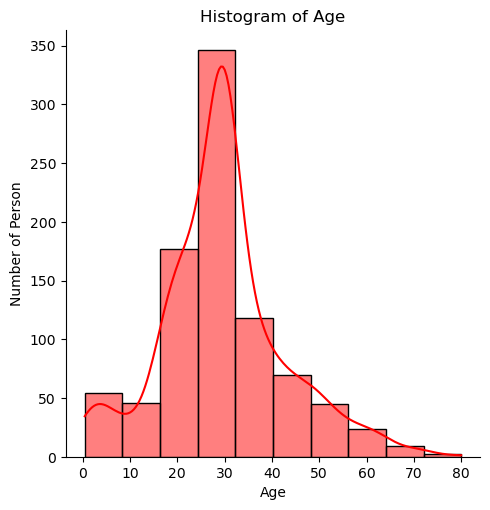

In [25]:
#  Titanic.Age.plot.hist()
sns.displot(Titanic.Age,bins =10 , kde = True, color = "Red")
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Number of Person")

(array([0, 1]), [Text(0, 0, 'male'), Text(1, 0, 'female')])

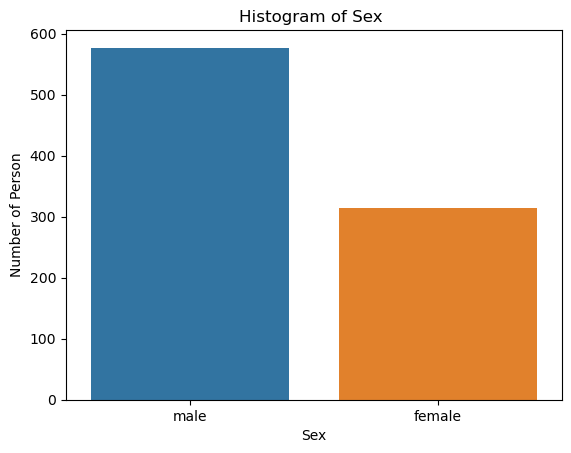

In [26]:
sns.countplot(x = "Sex", data = Titanic)
plt.xlabel("Sex")
plt.ylabel("Number of Person")
plt.title("Histogram of Sex ")
plt.xticks( rotation = 0 ) 

Text(4.944444444444445, 0.5, 'Number of Person')

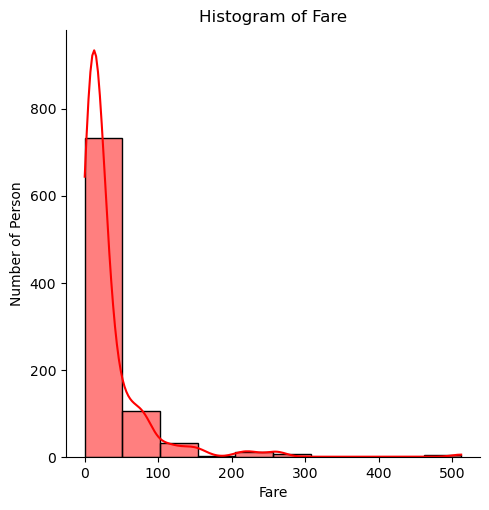

In [27]:
sns.displot(Titanic.Fare,bins =10 , kde = True, color = "Red")
plt.title("Histogram of Fare")
plt.xlabel("Fare")
plt.ylabel("Number of Person")

Text(4.944444444444445, 0.5, 'Number of Person')

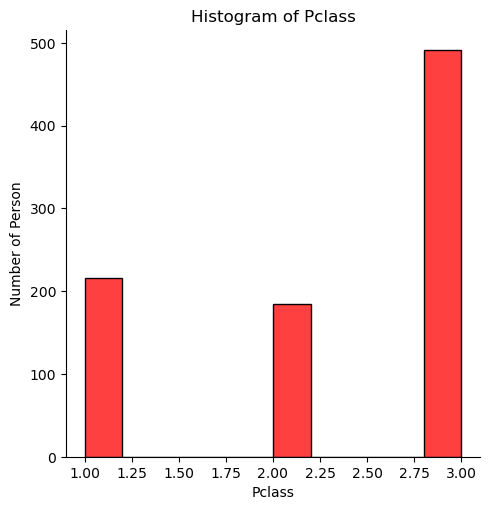

In [28]:
sns.displot(Titanic.Pclass,bins =10 , color = "Red")
plt.title("Histogram of Pclass")
plt.xlabel("Pclass")
plt.ylabel("Number of Person")

Text(4.944444444444445, 0.5, 'Number of Person')

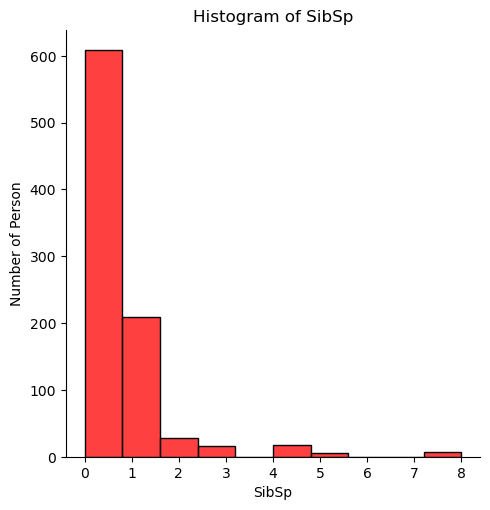

In [29]:
sns.displot(Titanic.SibSp,bins =10 , color = "Red")
plt.title("Histogram of SibSp")
plt.xlabel("SibSp")
plt.ylabel("Number of Person")

Text(4.944444444444445, 0.5, 'Number of Person')

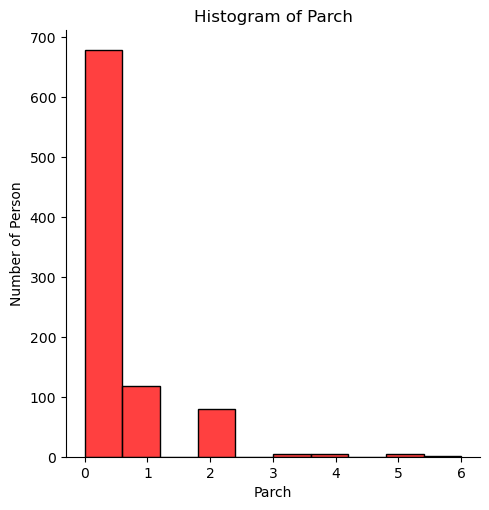

In [30]:
sns.displot(Titanic.Parch,bins =10 , color = "Red")
plt.title("Histogram of Parch")
plt.xlabel("Parch")
plt.ylabel("Number of Person")

(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

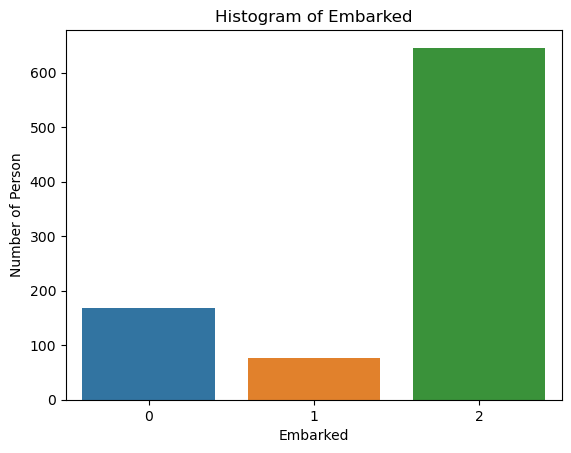

In [31]:
sns.countplot(x = "Embarked", data = Titanic)
plt.xlabel("Embarked")
plt.ylabel("Number of Person")
plt.title("Histogram of Embarked")
plt.xticks( rotation = 0 ) 

In [32]:
#Visualize the correlation between Sex and Age in a plot of your choosing. The visualized plot should give us obvious deductions concerning the importance of age and sex in the survival of the individuals.
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,2
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,2
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,2
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,2
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,2


In [33]:
New_data = Titanic.drop(["PassengerId","Survived" ,"Pclass", "Name", "SibSp", "Parch", "Ticket", "Fare", "Embarked"], axis = 1)
# Categorical to Numerical
New_data.Sex =encoder.fit_transform(New_data.Sex)
New_data

,Sex,Age
0,1,28.000000
1,1,25.000000
2,1,20.000000
3,0,29.000000
4,1,31.000000
...,...,...
886,0,14.000000
887,1,22.000000
888,0,30.000000
889,1,29.699118


<AxesSubplot:>

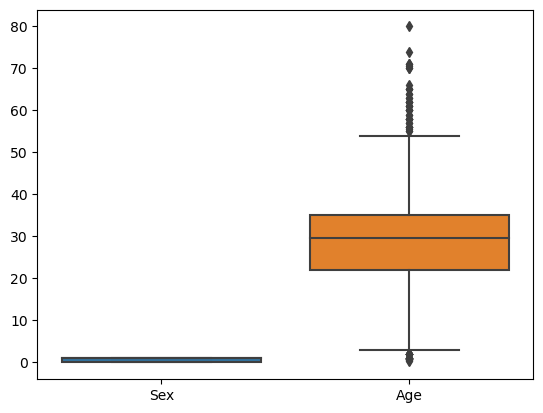

In [34]:
sns.boxplot(data = New_data)

<AxesSubplot:>

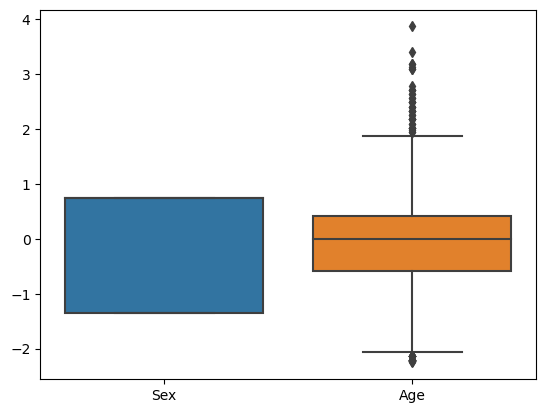

In [35]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
New_data.Age = scaler.fit_transform(pd.DataFrame(New_data.Age.values))
New_data.Sex = scaler.fit_transform(pd.DataFrame(New_data.Sex.values))
sns.boxplot(data = New_data)

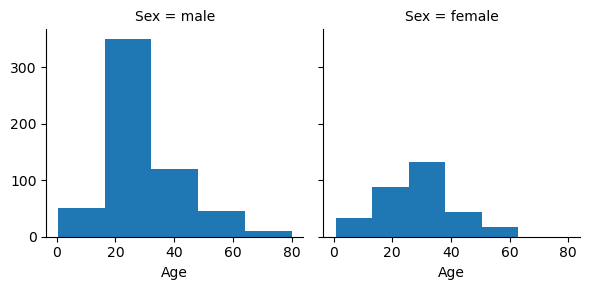

In [37]:
x = sns.FacetGrid(Titanic, col = "Sex")
x.map(plt.hist,"Age",bins = 5);

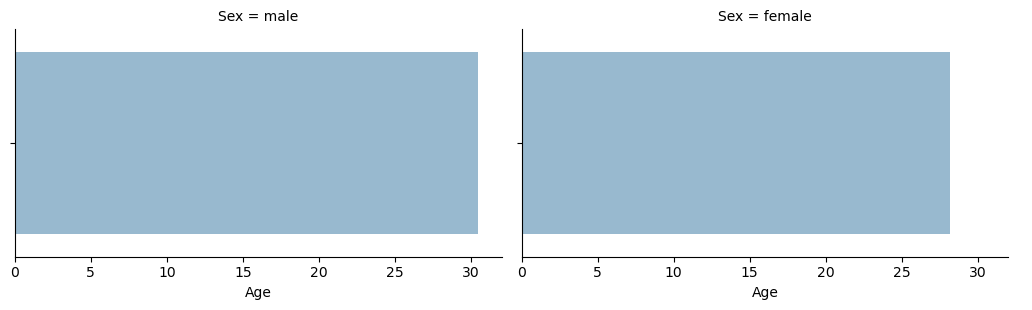

In [39]:
#Average AGE of MALE and FEMALE
x = sns.FacetGrid(Titanic, col = "Sex", height = 3.2, aspect =1.6)
x.map(sns.barplot,"Age", alpha =.5,ci = None, order = True)
x.add_legend();

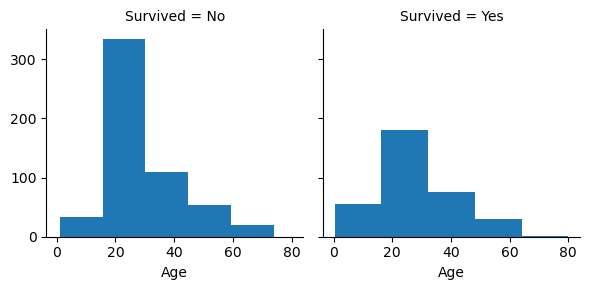

In [40]:
# Trying to Visualize some Graph
# Survived VS Age
n = sns.FacetGrid(Titanic, col='Survived')
n.map(plt.hist,"Age",bins=5);
#the younger the better chance of survival

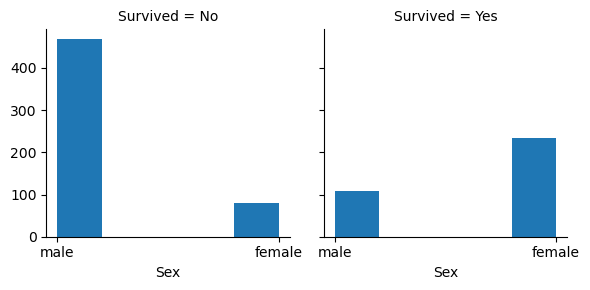

In [42]:
# Survived VS Sex
g = sns.FacetGrid(Titanic, col='Survived')
g.map(plt.hist,"Sex",bins=5);
# women have a better chance of surviving

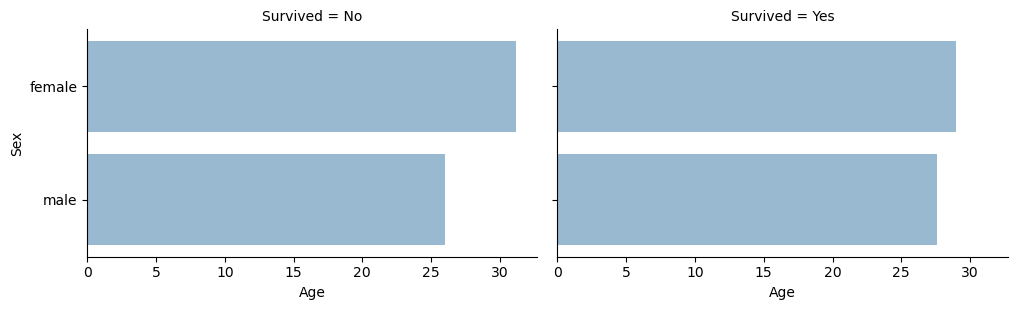

In [46]:
# Avrage MALE/FEMALE by Age that Suvived or not
grid = sns.FacetGrid(Titanic, col = "Survived", height = 3.2, aspect =1.6)
grid.map(sns.barplot,"Age","Sex", alpha =.5,ci = None, order = None)
grid.add_legend();

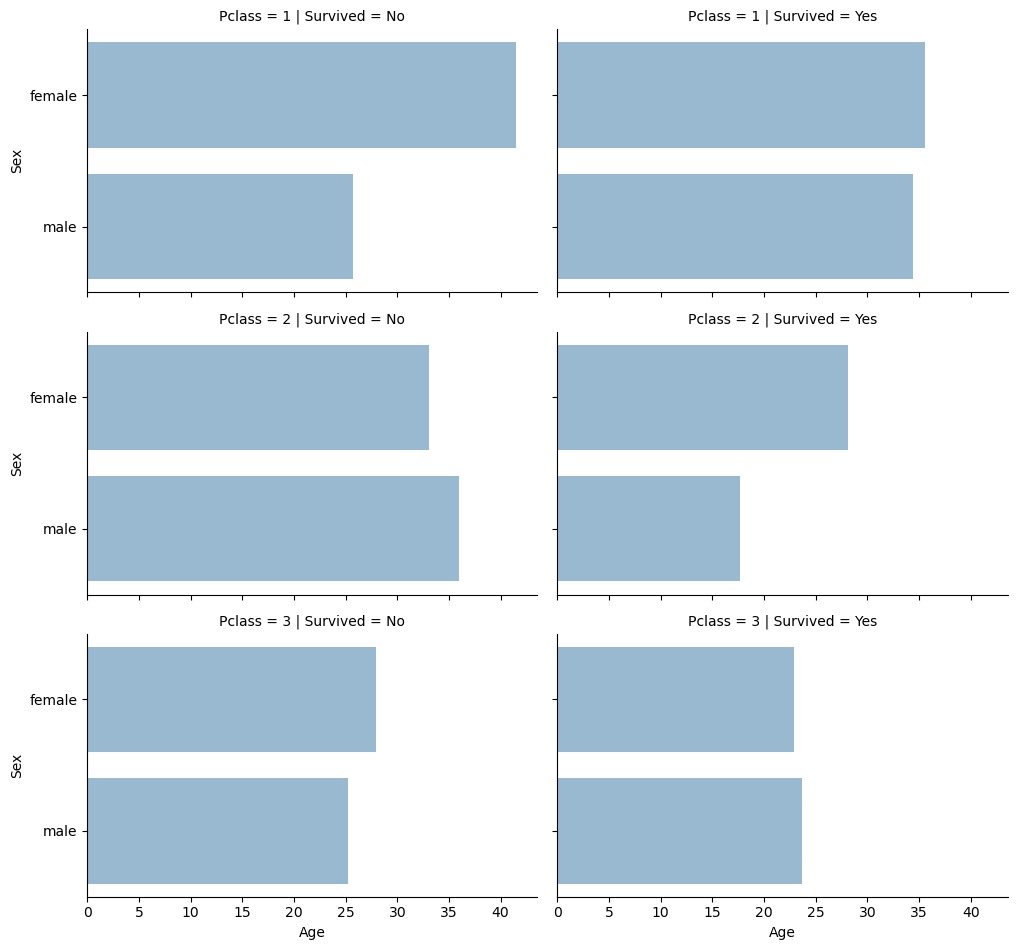

In [47]:
# Avrage MALE/FEMALE by Age that Suvived or not per Class
grid = sns.FacetGrid(Titanic,row = "Pclass" ,col = "Survived", height = 3.2, aspect =1.6)
grid.map(sns.barplot,"Age","Sex", alpha =.5,ci = None, order = None)
grid.add_legend();

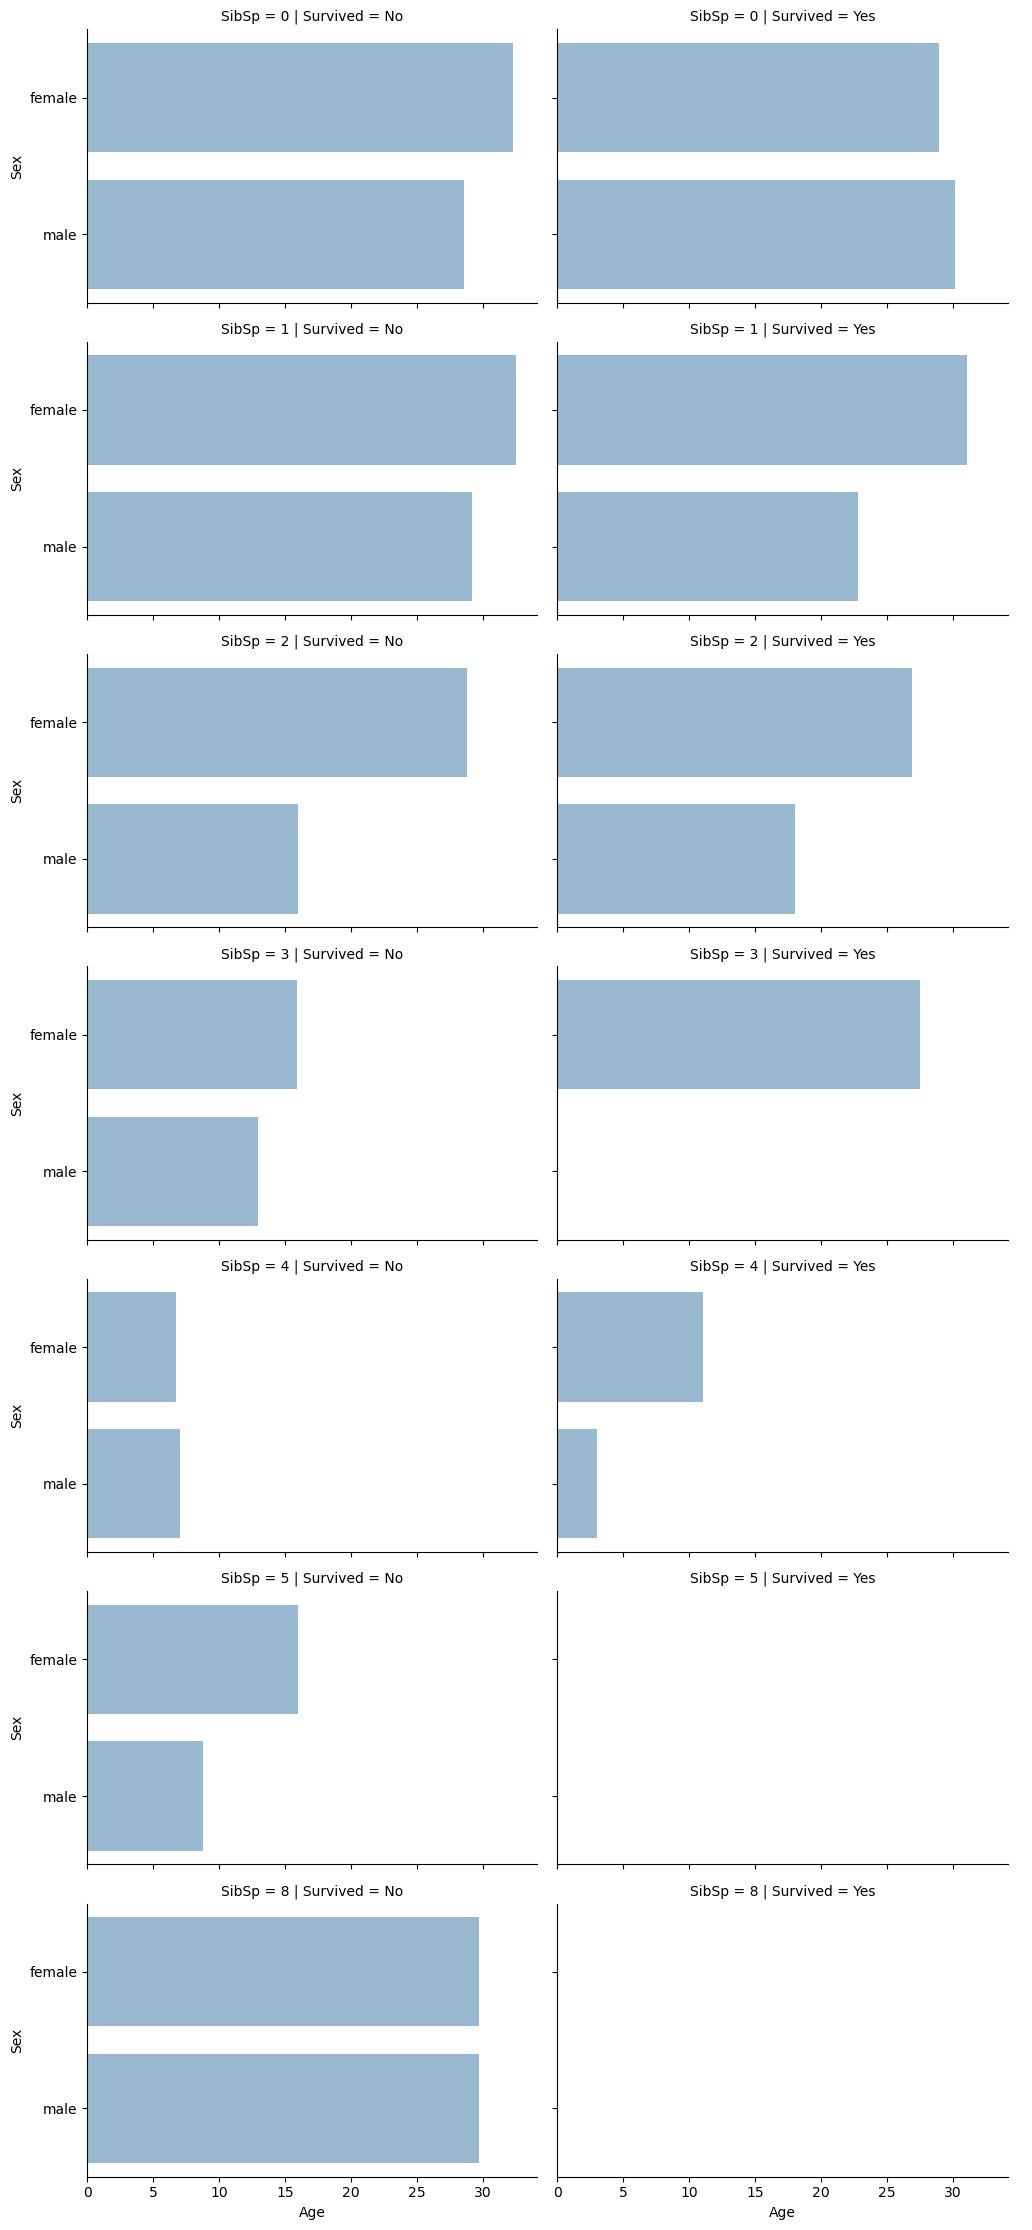

In [48]:
# Avrage MALE/FEMALE by Age that Suvived or not per SibSp
grid = sns.FacetGrid(Titanic,row = "SibSp" ,col = "Survived", height = 3.2, aspect =1.6)

grid.map(sns.barplot,"Age","Sex", alpha =.5,ci = None, order = None)
grid.add_legend();

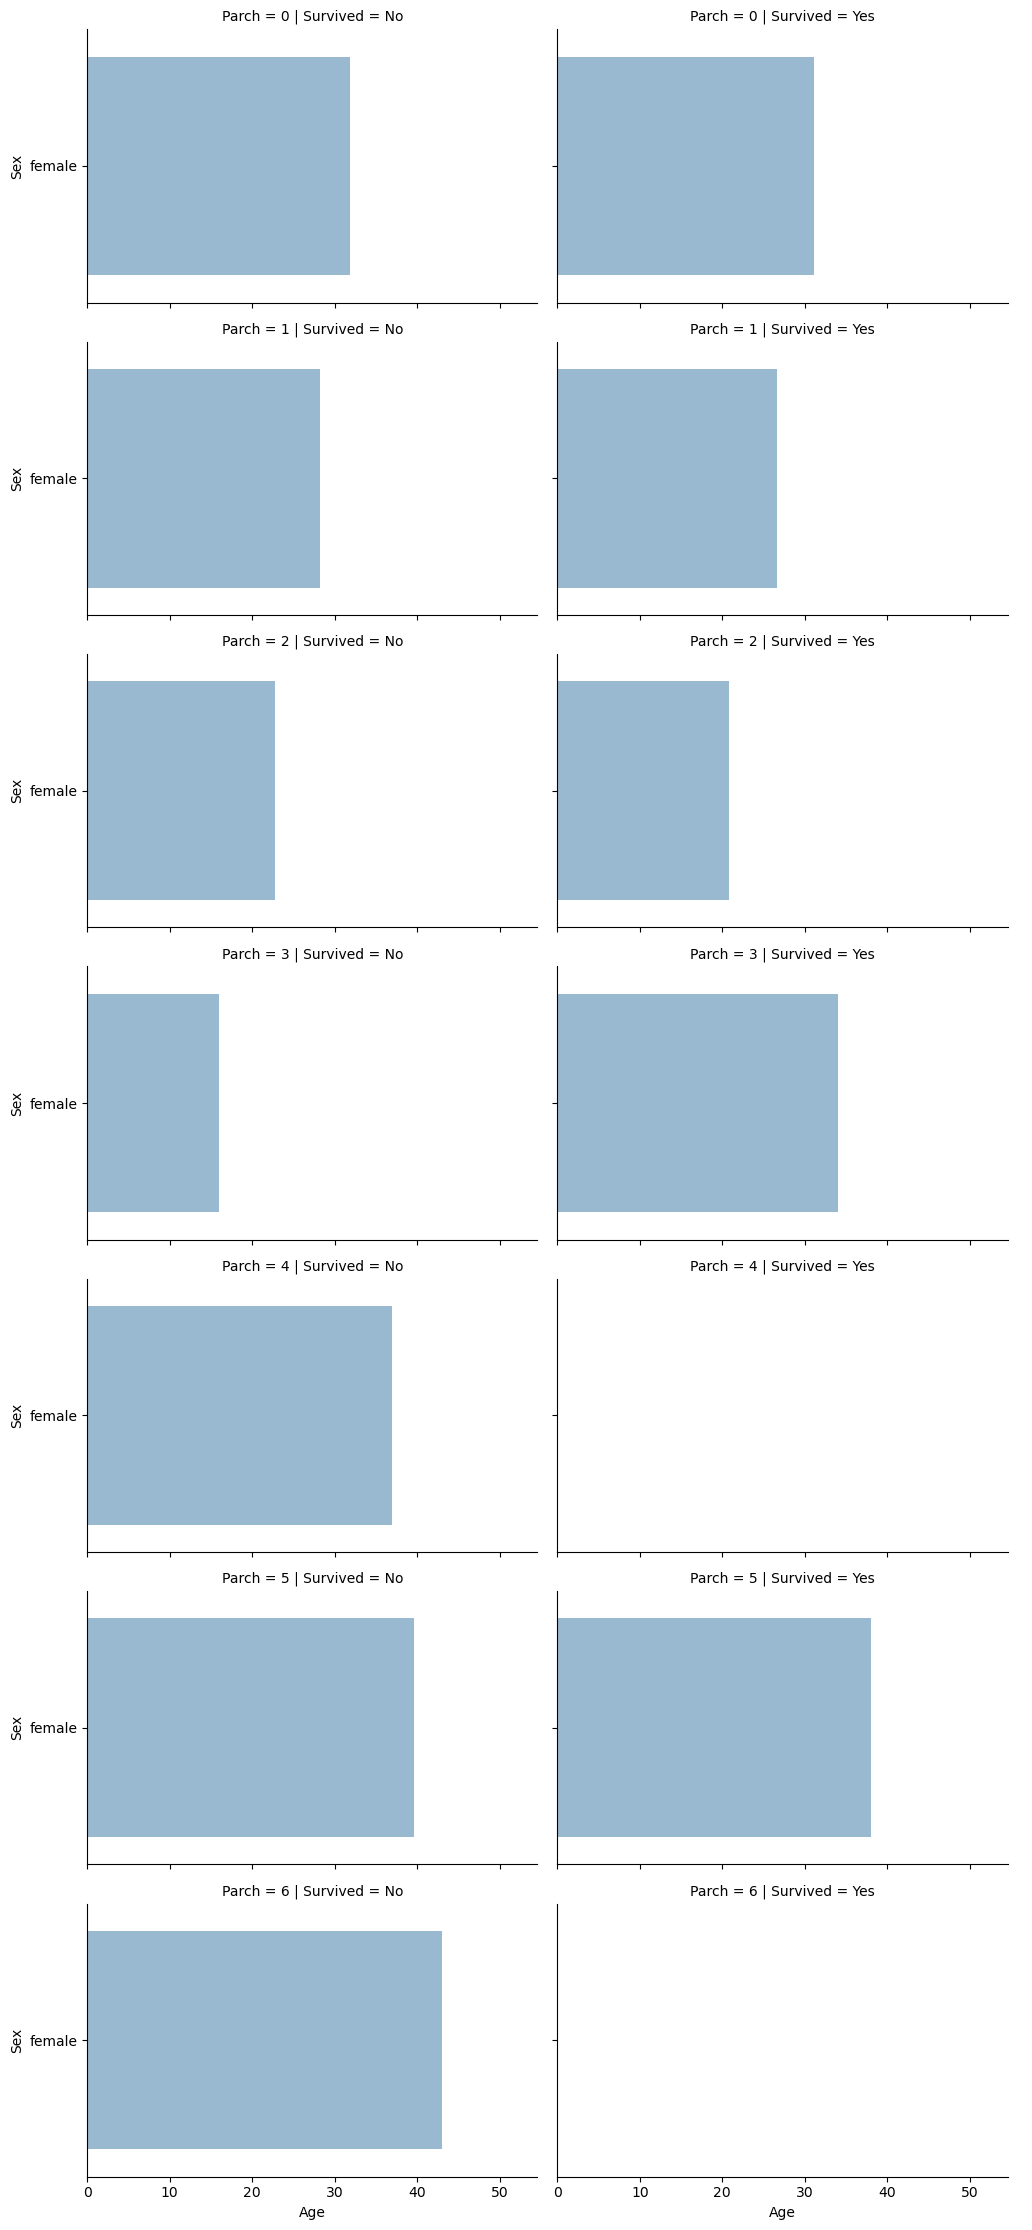

In [49]:
# Avrage MALE/FEMALE by Age that Suvived or not per Parch
grid = sns.FacetGrid(Titanic,row = "Parch" ,col = "Survived", height = 3.2, aspect =1.6)

grid.map(sns.barplot,"Age","Sex" , alpha =.5, ci = None, order = None)
grid.add_legend();

In [50]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

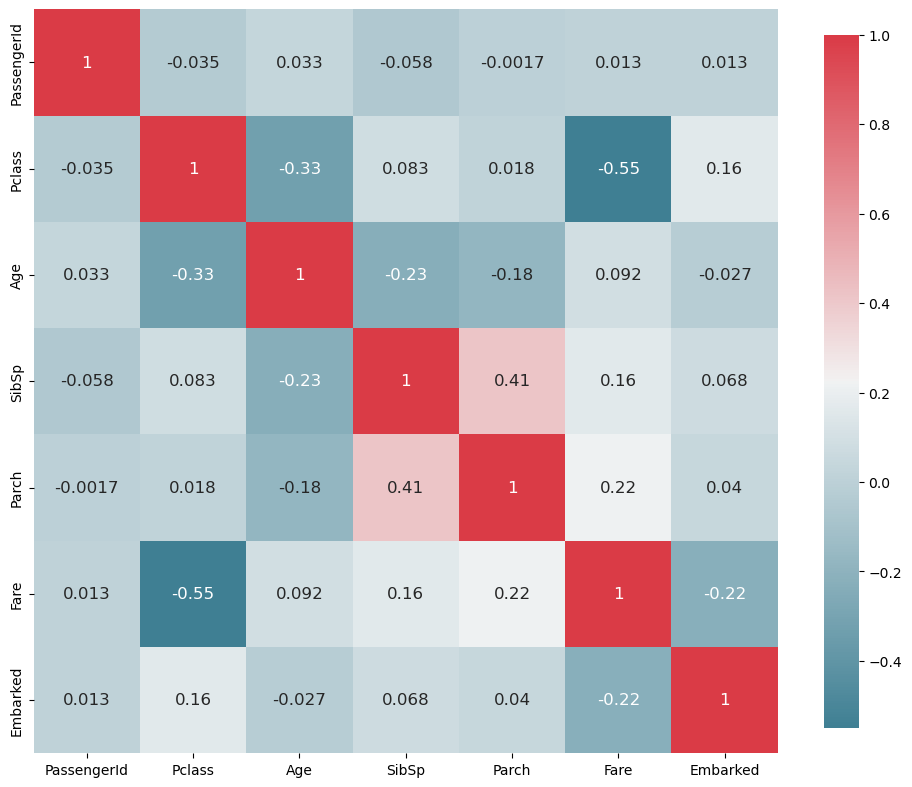

In [51]:
plot_correlation_map(Titanic)

# describtion
PassengerId has a neutral Colleration --> not important

Psclass and Fare have a Negative Colleration, same between Pcclass and Age

SipSp and Parch have a Positive Colleration



In [52]:
# Let's delete PassengerId
Titanic.drop(["PassengerId"],axis = 1 ,inplace = True)
Titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,2
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,2
2,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,2
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,2
4,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,2


### Use the groupby function combined with the mean() to view the relation between Pclass and survived 

In [53]:
Titanic.Survived.value_counts()

No     549
Yes    342
Name: Survived, dtype: int64

In [54]:
Titanic.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [55]:
cleanup={"Survived":{"Yes":1, "No": 0}}  # at first, let's convert Promoted to numerical format
Titanic.replace(cleanup, inplace=True)

In [56]:
Titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [57]:
Titanic[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [60]:
Titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,2
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,2
2,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,2
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,2
4,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,2


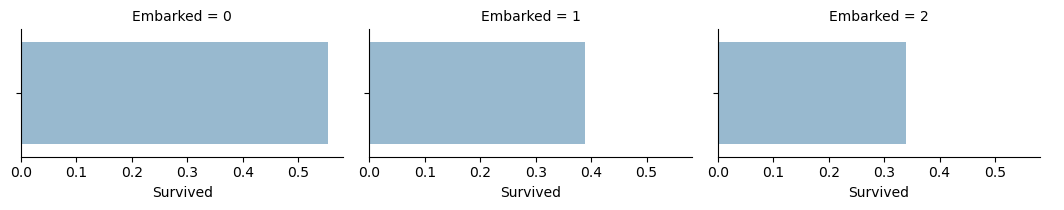

In [62]:
# Some Visualisation
# Survieved vs embarked
grid = sns.FacetGrid(Titanic, col="Embarked", height=2.2, aspect=1.6)
grid.map(sns.barplot, "Survived", alpha=.5, ci=None , order = None)
grid.add_legend();

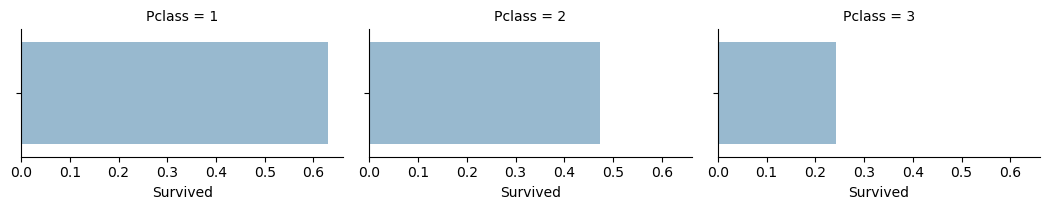

In [63]:
# Survieved vs Pclass
grid = sns.FacetGrid(Titanic, col="Pclass", height=2.2, aspect=1.6)
grid.map(sns.barplot, "Survived", alpha=.5, ci=None , order = None)
grid.add_legend();

In [64]:
Titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,2
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,2
2,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,2
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,2
4,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,2


In [65]:
# Droping useless columns --> Ticket
Titanic =Titanic.drop(["Ticket"],axis = 1 )

In [66]:
Titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,13.0000,2
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500,2
2,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,7.8542,2
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,2
4,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,52.0000,2


In [67]:
# Droping useless columns --> Name
Tianic1 =Titanic.drop(["Name"],axis = 1 )
Tianic1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,male,28.0,0,0,13.0000,2
1,0,3,male,25.0,0,0,7.6500,2
2,0,3,male,20.0,0,0,7.8542,2
3,0,3,female,29.0,0,4,21.0750,2
4,0,1,male,31.0,1,0,52.0000,2


In [68]:
Dicto = {"Capt":"Officer","Col":"Officer","Major":"Officer","Dr":"Officer","Rev":"Officer","Jonkheer":"Royalty","Don":"Royalty","Sir":"Royalty","Lady" :"Royalty","the Countess": "Royalty","Dona": "Royalty","Mme":"Miss","Mlle":"Miss","Miss" :"Miss","Ms":"Mrs","Mr" : "Mrs","Mrs" :"Mrs","Master" :"Master"}
Dicto

{'Capt': 'Officer',
 'Col': 'Officer',
 'Major': 'Officer',
 'Dr': 'Officer',
 'Rev': 'Officer',
 'Jonkheer': 'Royalty',
 'Don': 'Royalty',
 'Sir': 'Royalty',
 'Lady': 'Royalty',
 'the Countess': 'Royalty',
 'Dona': 'Royalty',
 'Mme': 'Miss',
 'Mlle': 'Miss',
 'Miss': 'Miss',
 'Ms': 'Mrs',
 'Mr': 'Mrs',
 'Mrs': 'Mrs',
 'Master': 'Master'}

In [69]:
# Split ,
T1 = Titanic.Name.str.split(', ', expand=True)
T1

,0,1
0,Collander,Mr. Erik Gustaf
1,Moen,Mr. Sigurd Hansen
2,Jensen,Mr. Hans Peder
3,Palsson,Mrs. Nils (Alma Cornelia Berglund)
4,Davidson,Mr. Thornton
...,...,...
886,Nasser,Mrs. Nicholas (Adele Achem)
887,Sirayanian,Mr. Orsen
888,Cacic,Miss. Marija
889,Petroff,"Mr. Pastcho (""Pentcho"")"


In [70]:
# split .
T2 =T1[1].str.split('.', expand=True)
T2

,0,1,2
0,Mr,Erik Gustaf,None
1,Mr,Sigurd Hansen,None
2,Mr,Hans Peder,None
3,Mrs,Nils (Alma Cornelia Berglund),None
4,Mr,Thornton,None
...,...,...,...
886,Mrs,Nicholas (Adele Achem),None
887,Mr,Orsen,None
888,Miss,Marija,None
889,Mr,"Pastcho (""Pentcho"")",None


In [71]:
Titanic['Title'] = T2[0]
Titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,13.0000,2,Mr
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500,2,Mr
2,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,7.8542,2,Mr
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,2,Mrs
4,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,52.0000,2,Mr


In [72]:
Dicto2 = {'Title':Dicto}
print(Dicto2)

{'Title': {'Capt': 'Officer', 'Col': 'Officer', 'Major': 'Officer', 'Dr': 'Officer', 'Rev': 'Officer', 'Jonkheer': 'Royalty', 'Don': 'Royalty', 'Sir': 'Royalty', 'Lady': 'Royalty', 'the Countess': 'Royalty', 'Dona': 'Royalty', 'Mme': 'Miss', 'Mlle': 'Miss', 'Miss': 'Miss', 'Ms': 'Mrs', 'Mr': 'Mrs', 'Mrs': 'Mrs', 'Master': 'Master'}}


In [73]:
Titanic.replace(Dicto2,inplace =True)
Titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,13.0000,2,Mrs
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500,2,Mrs
2,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,7.8542,2,Mrs
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,2,Mrs
4,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,52.0000,2,Mrs


In [74]:
Titanic.Title.value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

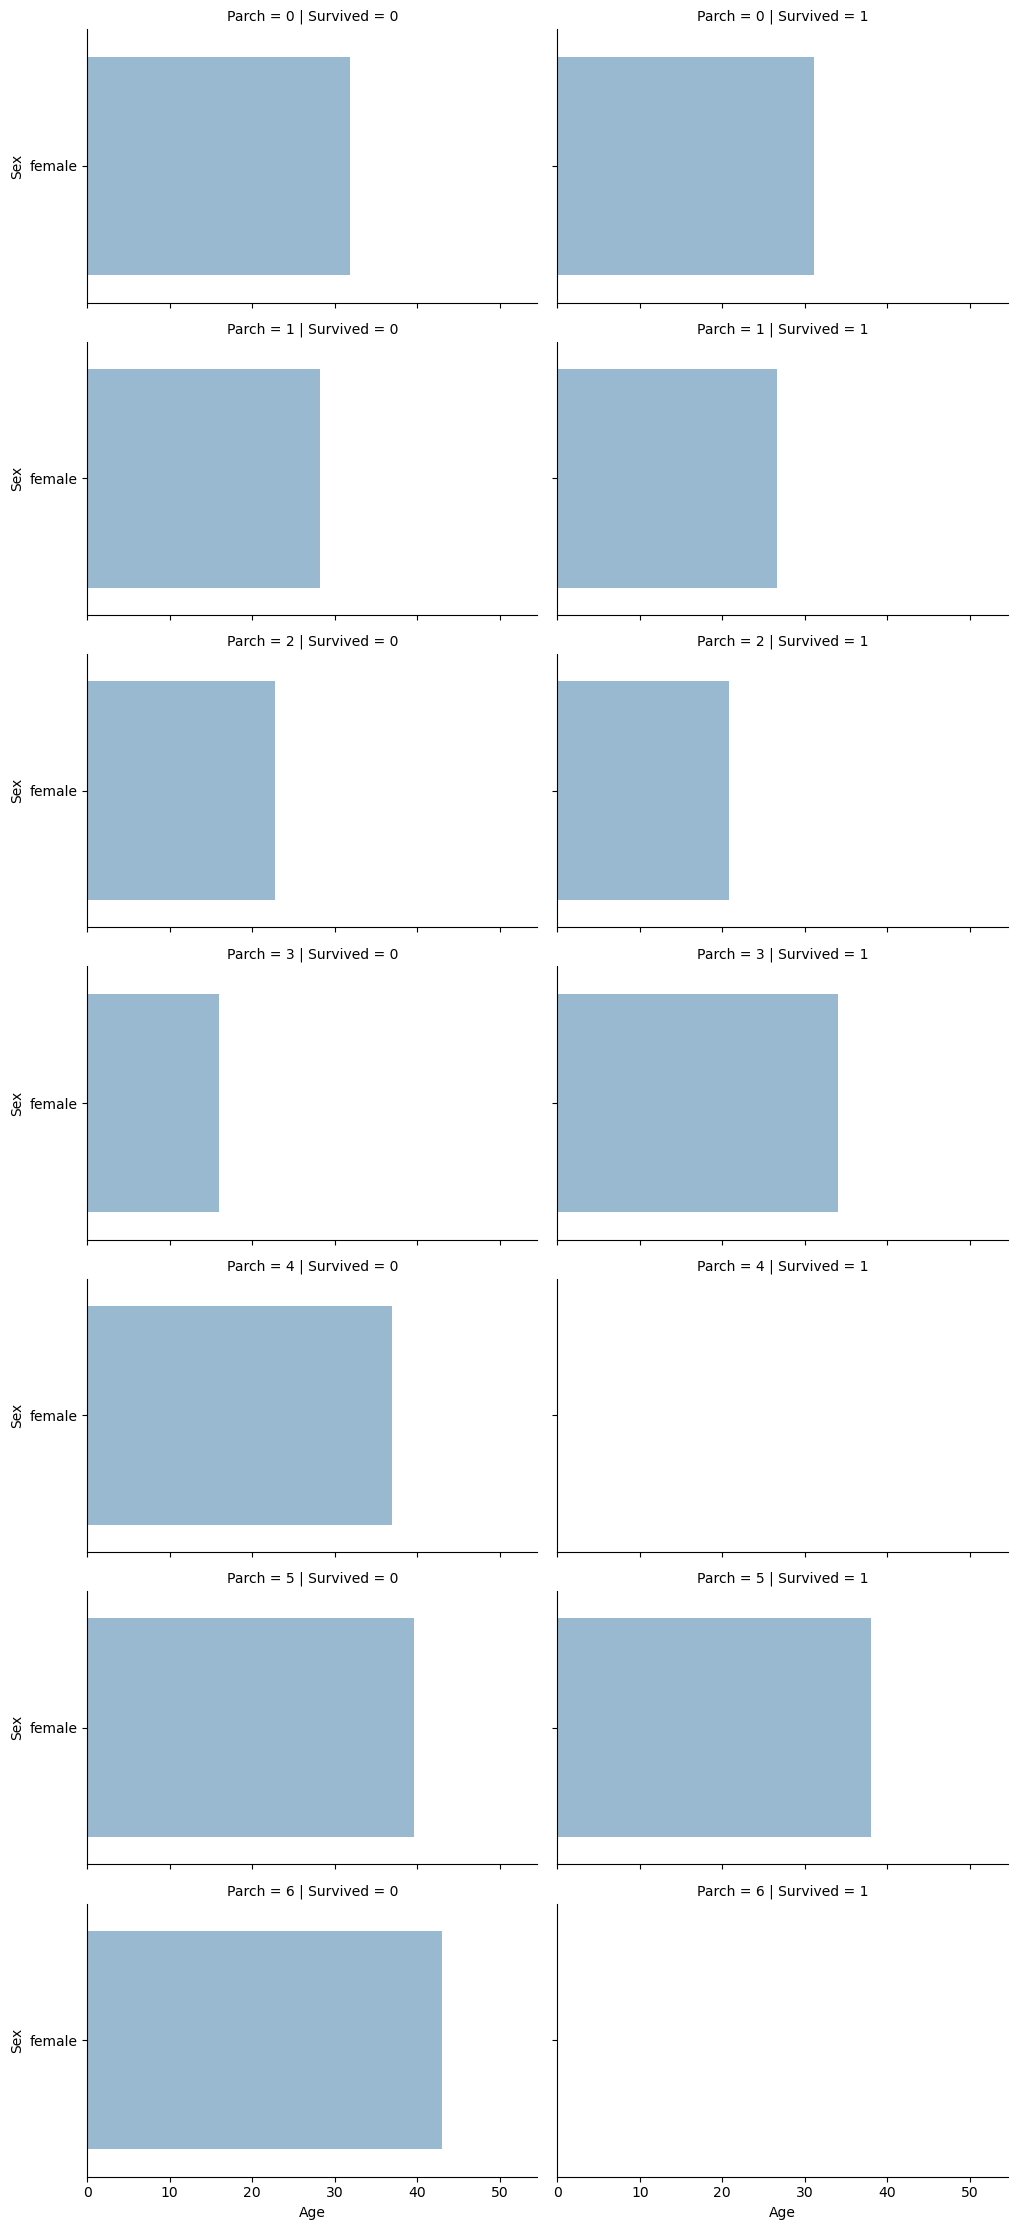

In [76]:
grid = sns.FacetGrid(Titanic,row = "Parch" ,col = "Survived", height = 3.2, aspect =1.6)

grid.map(sns.barplot,"Age","Sex", alpha =.5,ci = None , order = None)
grid.add_legend();

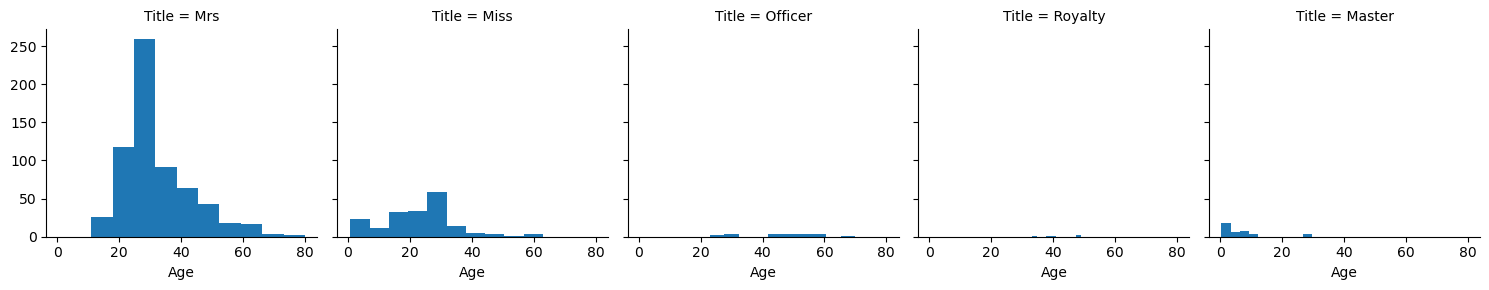

In [77]:
# Visualize the correlation between Title and other features(e.g Sex, Fare, Age...)
# Title Vs Survived 
g = sns.FacetGrid(Titanic, col='Title')
g.map(plt.hist,"Age",bins=10);

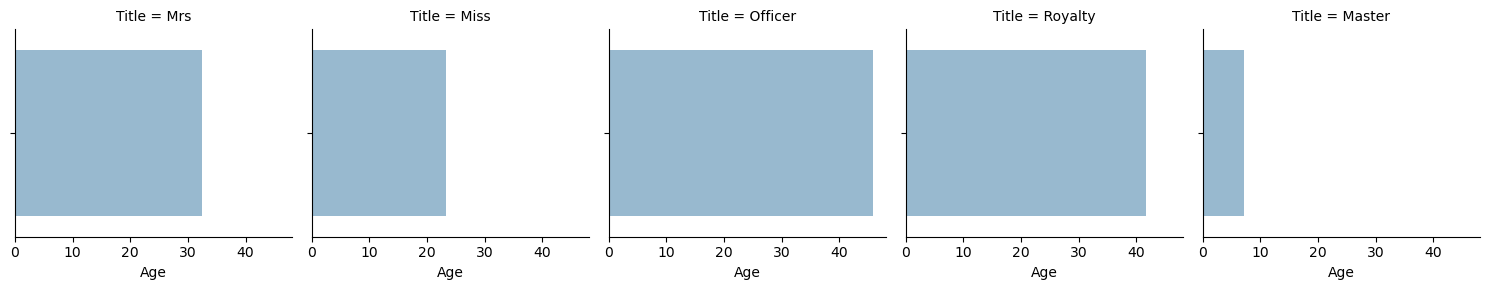

In [79]:
# Title Vs Age 
g = sns.FacetGrid(Titanic, col='Title')
g.map(sns.barplot,"Age", alpha =.5,ci = None , order = None)
g.add_legend();

In [80]:
# Sex from Categorical to Nemrical
encoder = LabelEncoder()
Titanic.Sex =encoder.fit_transform(Titanic.Sex)
Titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,2,Mrs
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,2,Mrs
2,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,2,Mrs
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,2,Mrs
4,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,2,Mrs


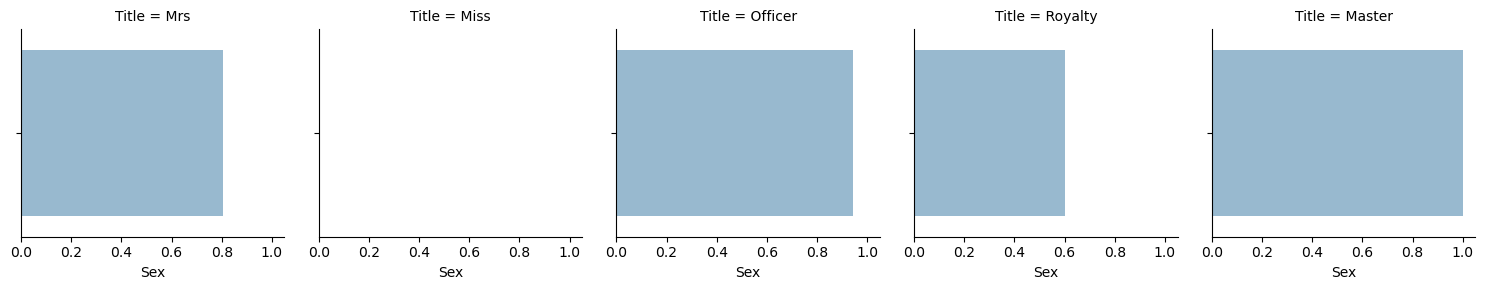

In [82]:
# Title Vs Sex 
g = sns.FacetGrid(Titanic, col='Title')
g.map(sns.barplot,"Sex", alpha =.5,ci = None , order = None)
g.add_legend();

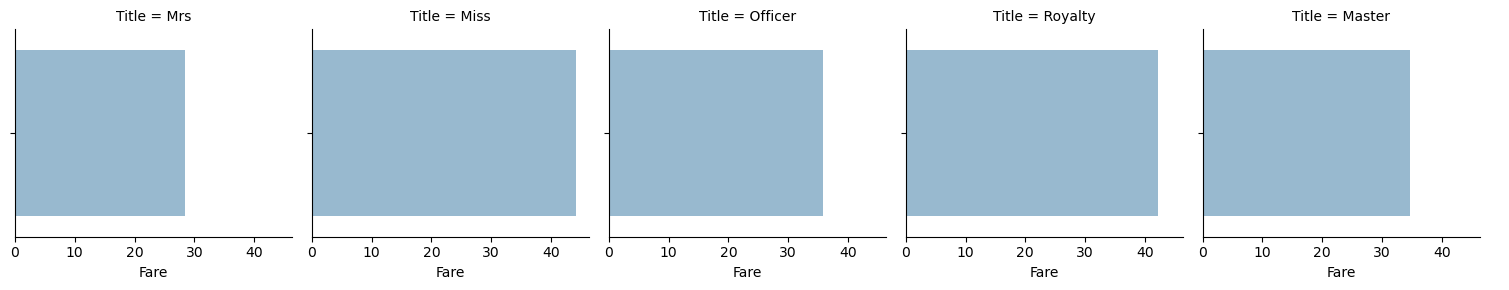

In [83]:
# Title Vs Fare 
g = sns.FacetGrid(Titanic, col='Title')
g.map(sns.barplot,"Fare", alpha =.5,ci = None , order = None)
g.add_legend();

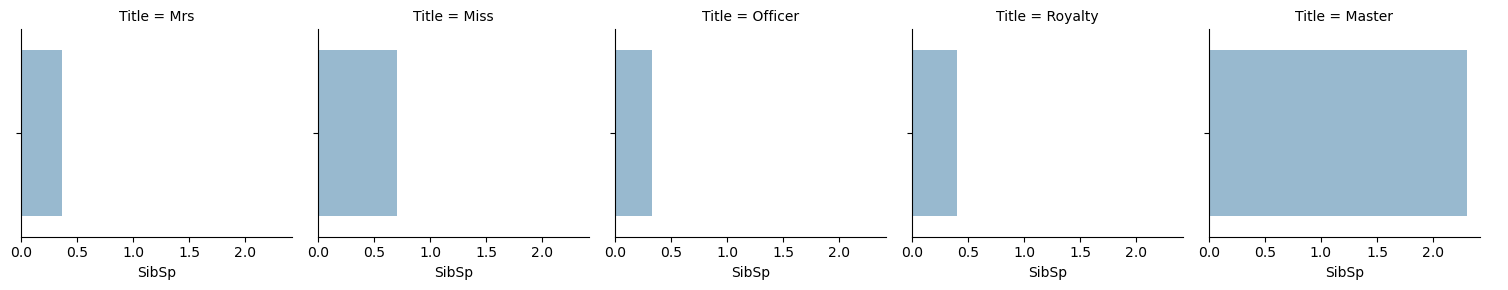

In [84]:
# Title Vs SibSp 
g = sns.FacetGrid(Titanic, col='Title')
g.map(sns.barplot,"SibSp", alpha =.5,ci = None , order = None)
g.add_legend();

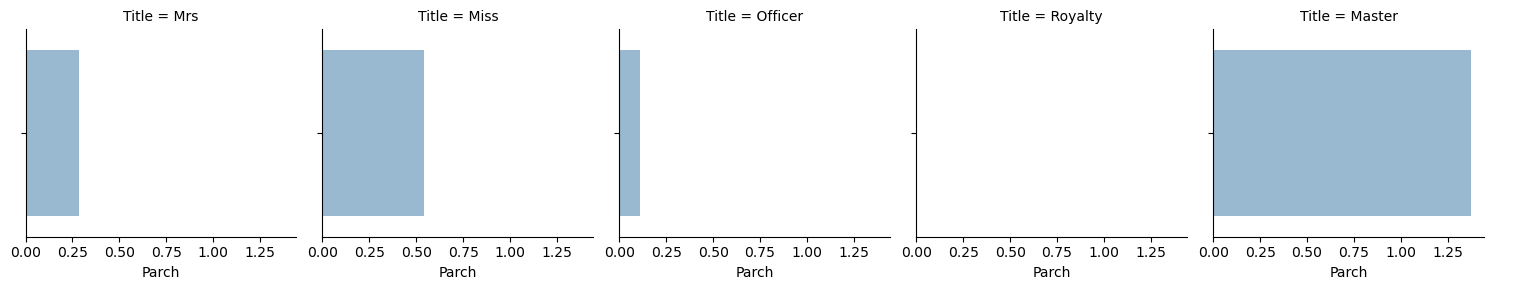

In [85]:
# Title Vs Parch 
g = sns.FacetGrid(Titanic, col='Title')
g.map(sns.barplot,"Parch", alpha =.5,ci = None , order = None)
g.add_legend();

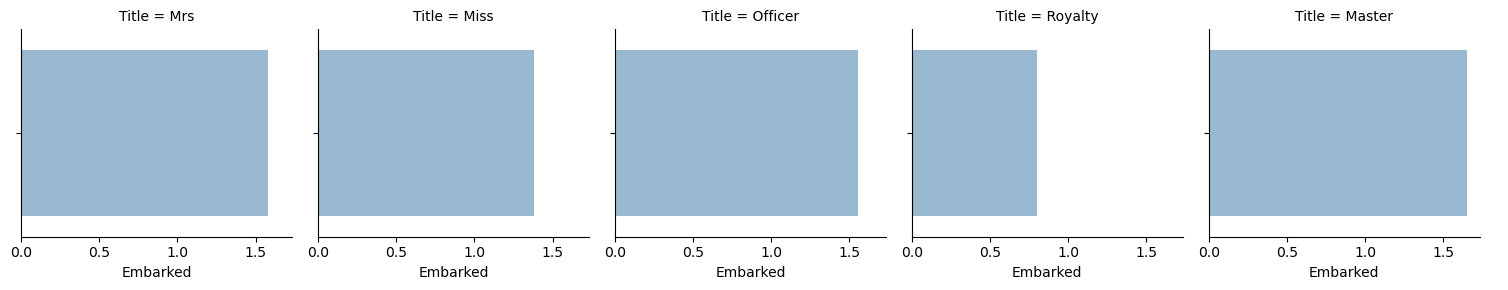

In [87]:
# Title Vs Embarked 
g = sns.FacetGrid(Titanic, col='Title')
g.map(sns.barplot,"Embarked", alpha =.5,ci = None ,order = None)
g.add_legend();

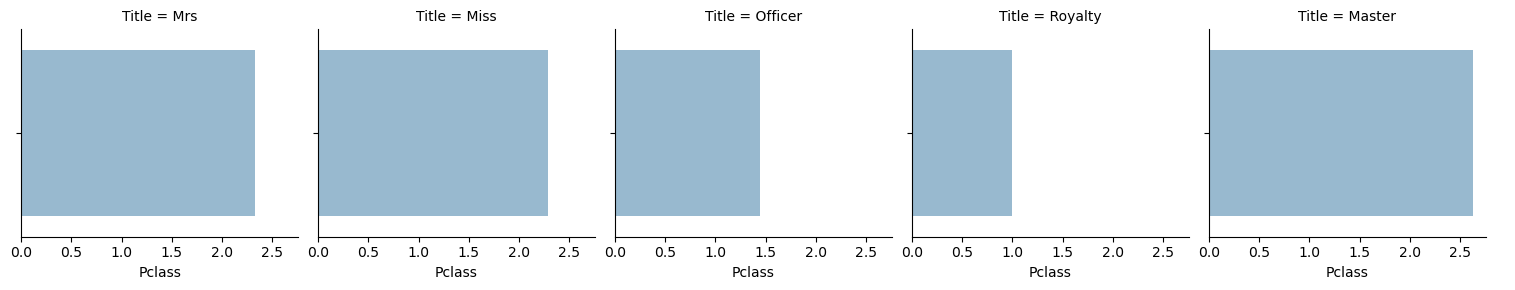

In [88]:
# Title Vs Pclass 
g = sns.FacetGrid(Titanic, col='Title')
g.map(sns.barplot,"Pclass", alpha =.5,ci = None ,order = None)
g.add_legend();

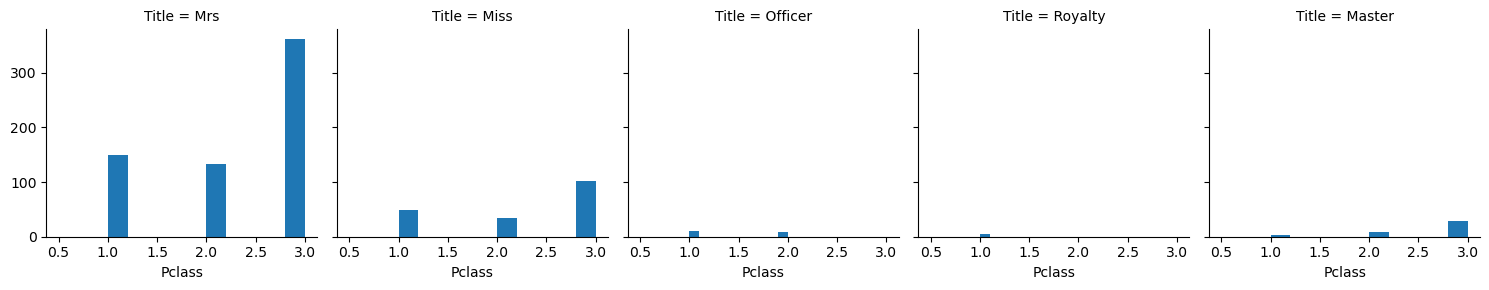

In [89]:
# Title Vs Pclass 
g = sns.FacetGrid(Titanic, col='Title')
g.map(plt.hist,"Pclass",bins=10);

In [90]:
Titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,2,Mrs
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,2,Mrs
2,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,2,Mrs
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,2,Mrs
4,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,2,Mrs


In [91]:
Titanic = Titanic.assign(AGE = pd.cut(Titanic["Age"], bins =[0,6,18,55,999],labels = ["child", "teenager","Adults","old"]))
Titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AGE
0,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,2,Mrs,Adults
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,2,Mrs,Adults
2,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,2,Mrs,Adults
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,2,Mrs,Adults
4,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,2,Mrs,Adults


In [92]:
Titanic.AGE.value_counts()

Adults      712
teenager     92
child        47
old          40
Name: AGE, dtype: int64

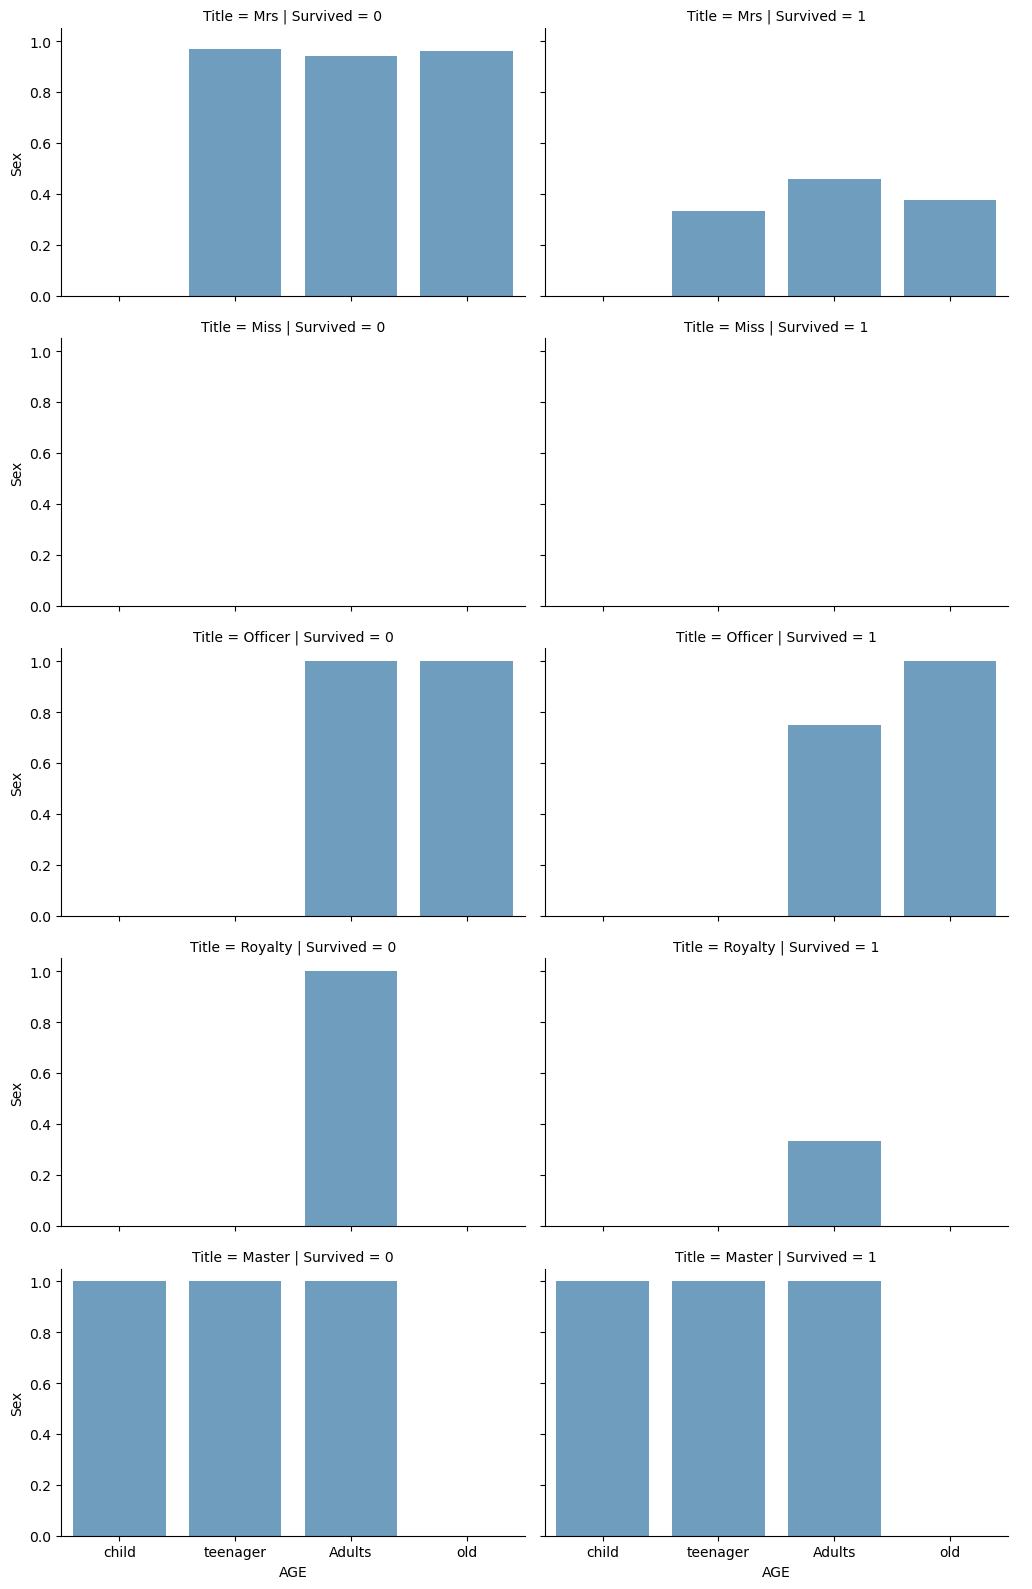

In [93]:
grid = sns.FacetGrid(Titanic,row = "Title" ,col = "Survived", height = 3.2, aspect =1.6)
grid.map(sns.barplot,"AGE","Sex", alpha =.7,ci = None  ,order = None)
grid.add_legend();

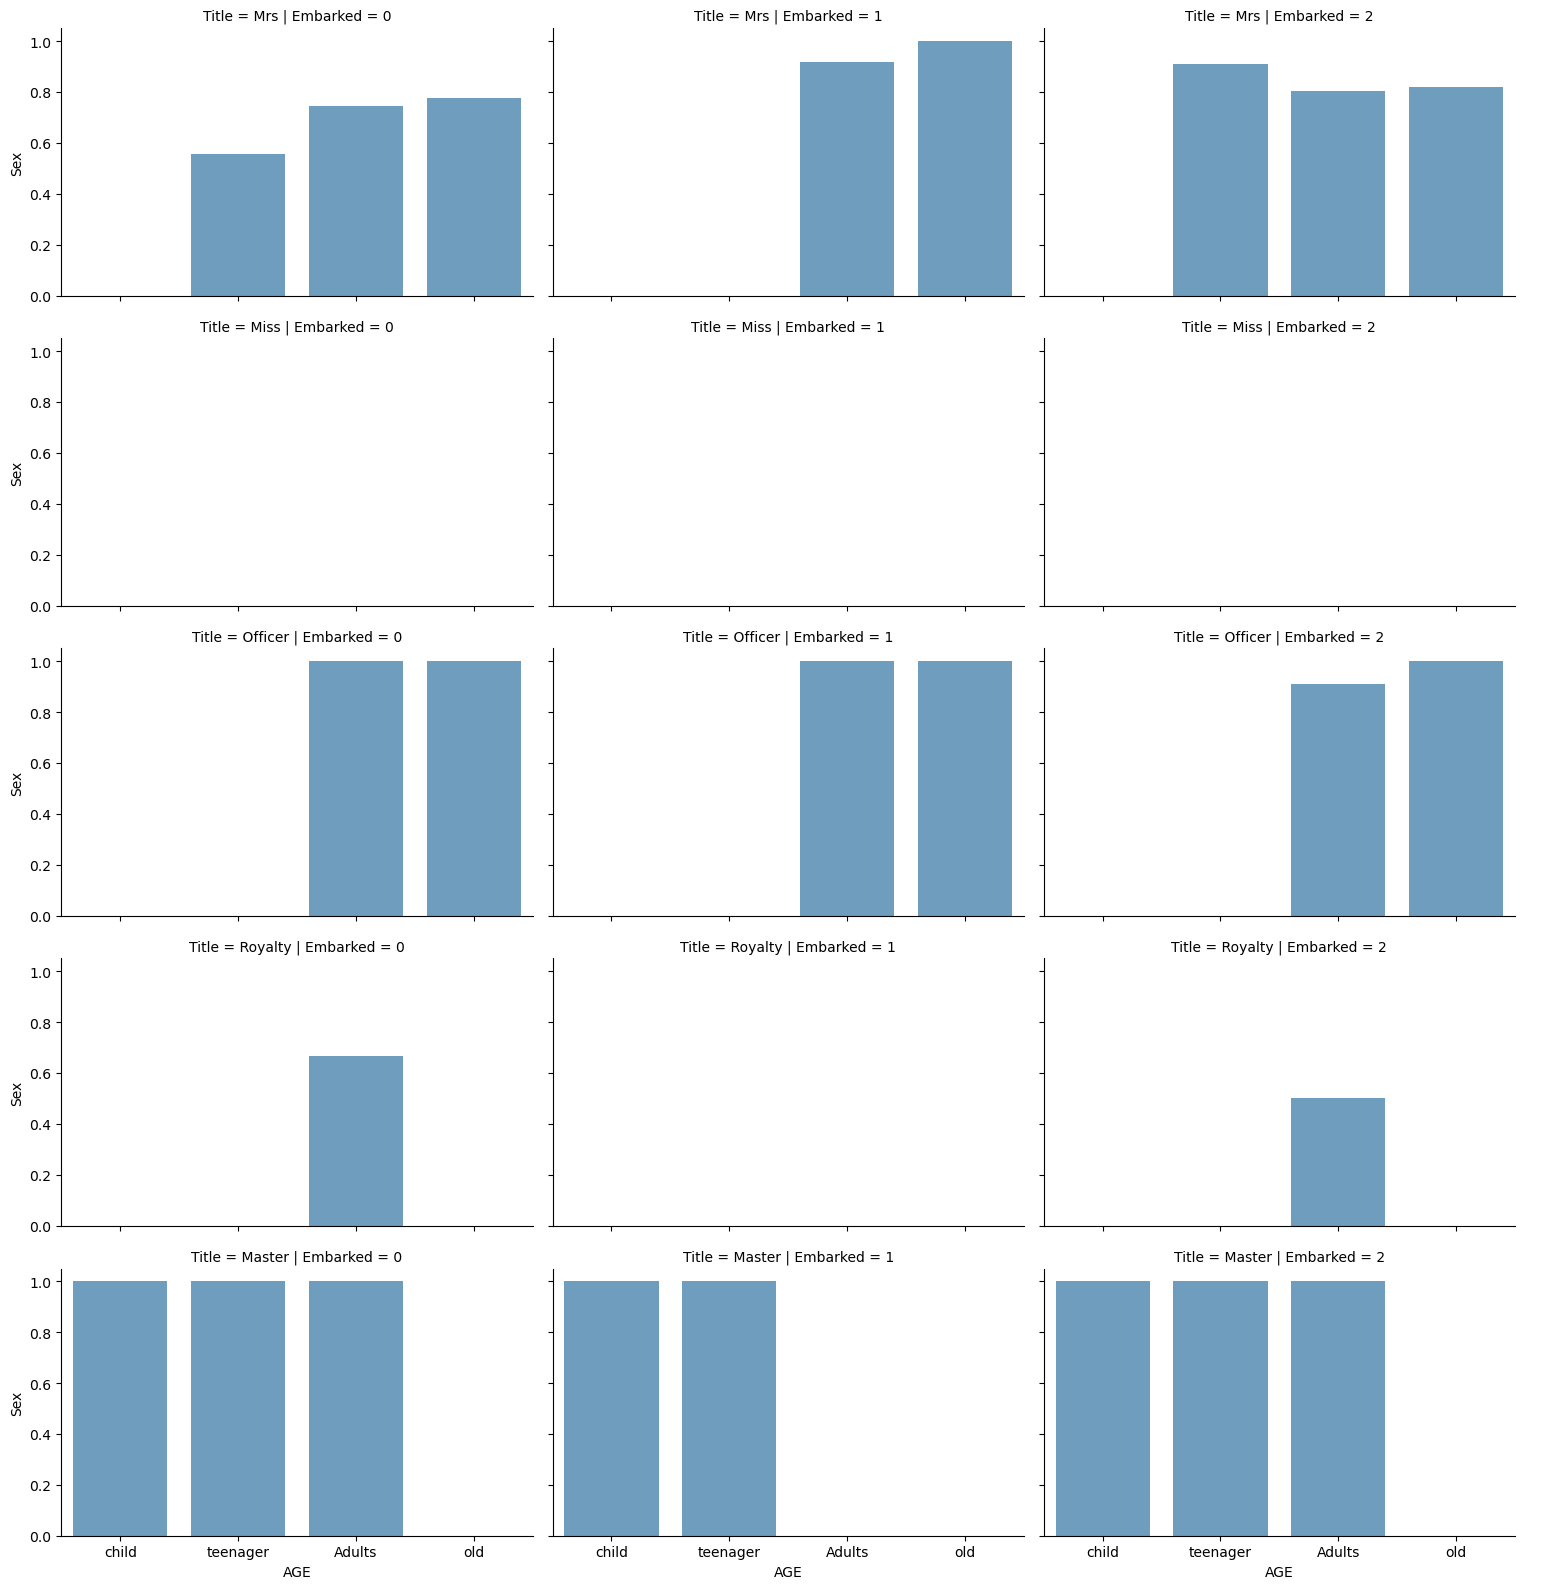

In [94]:
grid = sns.FacetGrid(Titanic,row = "Title" ,col = "Embarked", height = 3.2, aspect =1.6)
grid.map(sns.barplot,"AGE","Sex", alpha =.7,ci = None  ,order = None)
grid.add_legend();

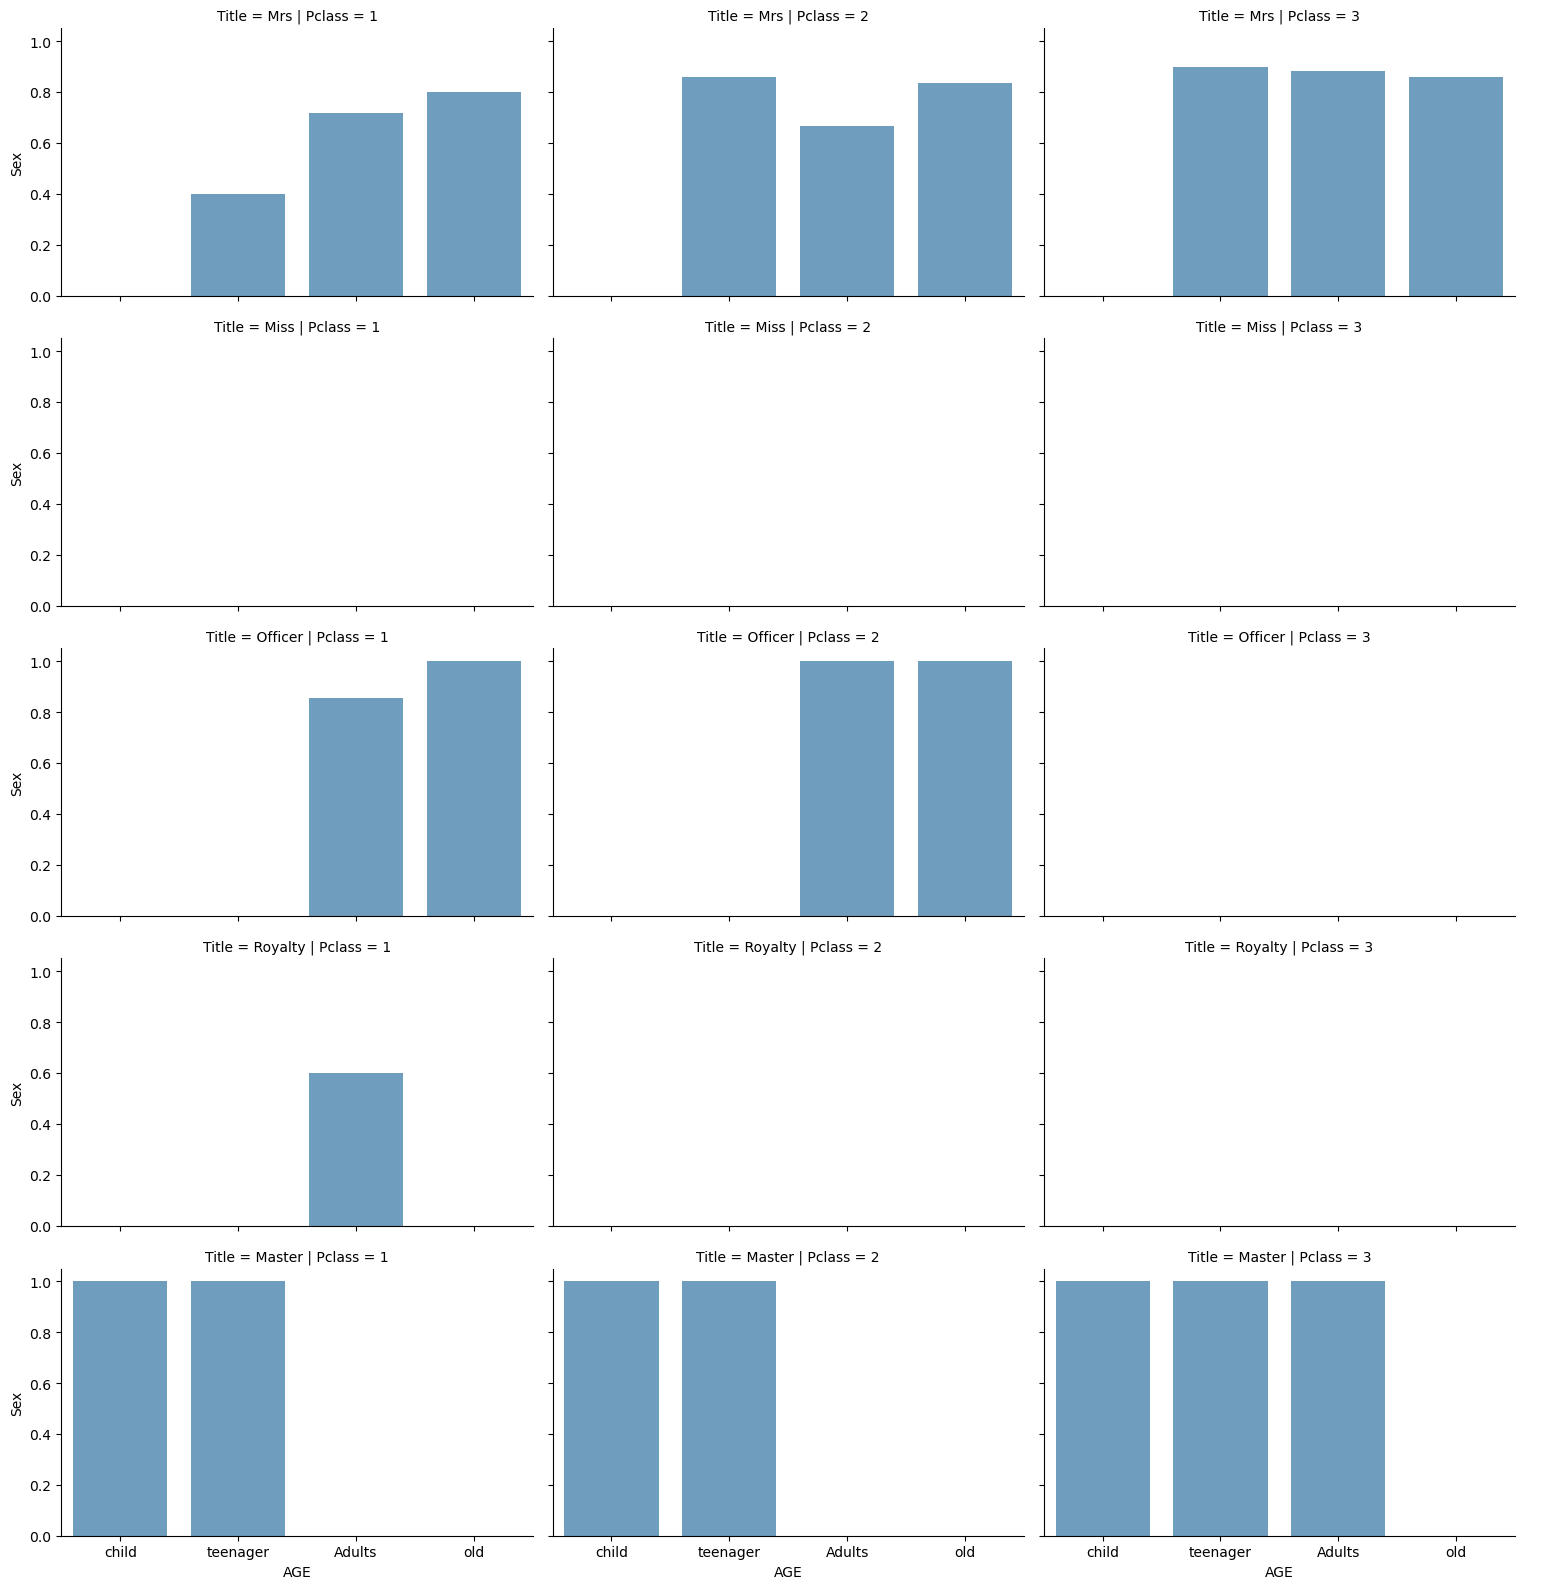

In [95]:
grid = sns.FacetGrid(Titanic,row = "Title" ,col = "Pclass", height = 3.2, aspect =1.6)
grid.map(sns.barplot,"AGE","Sex", alpha =.7,ci = None  ,order = None)
grid.add_legend();

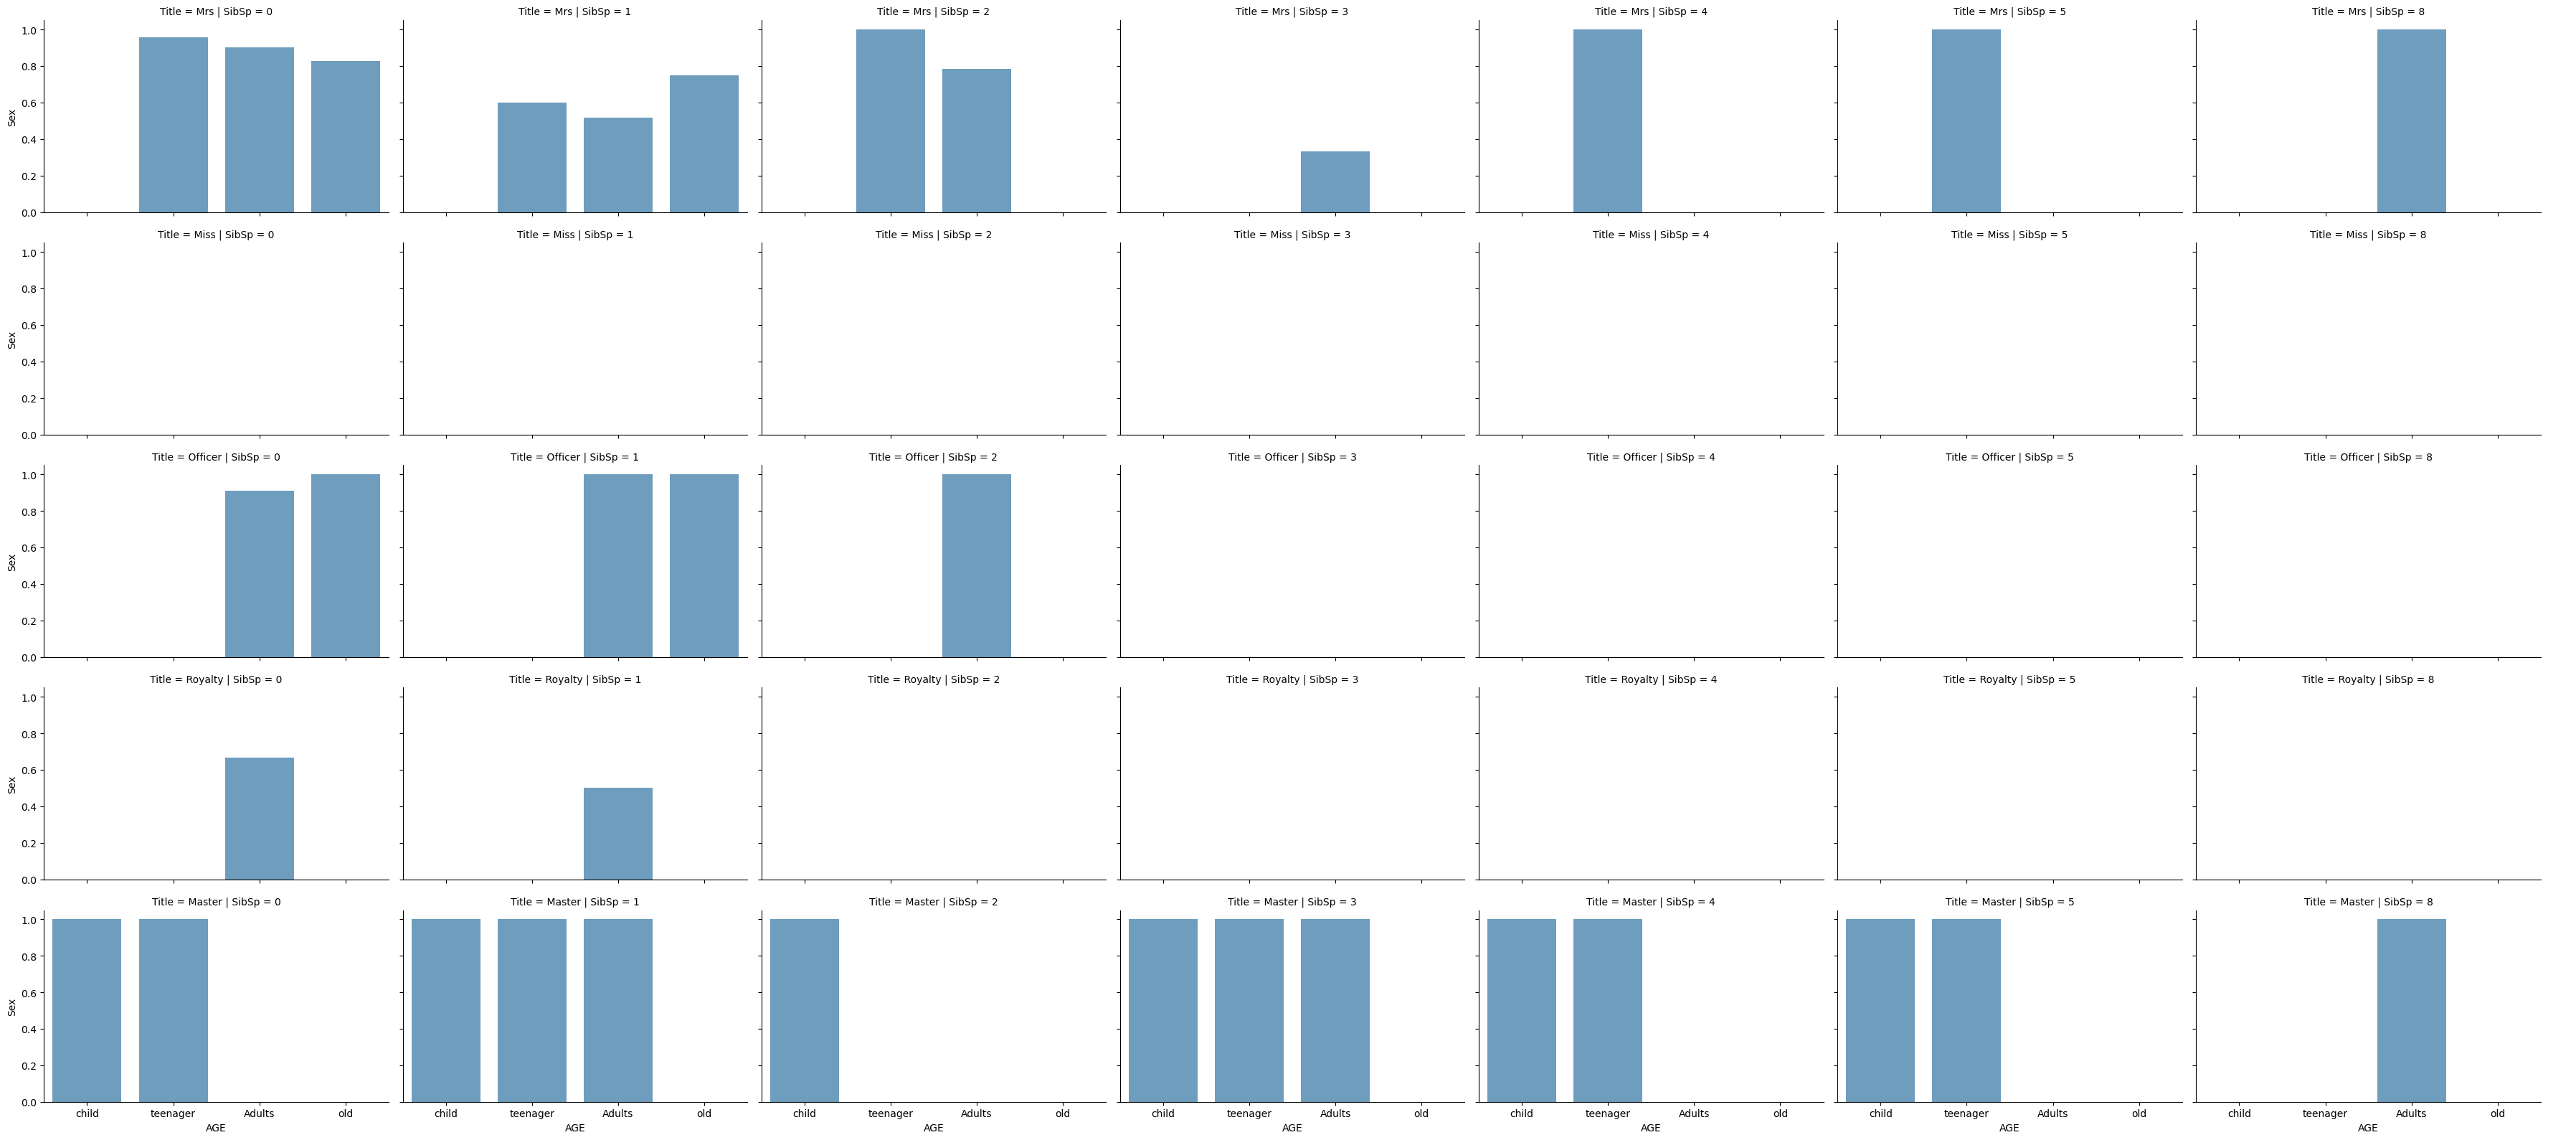

In [96]:
grid = sns.FacetGrid(Titanic,row = "Title" ,col = "SibSp", height = 3.2, aspect =1.6)
grid.map(sns.barplot,"AGE","Sex", alpha =.7,ci = None ,order = None)
grid.add_legend();

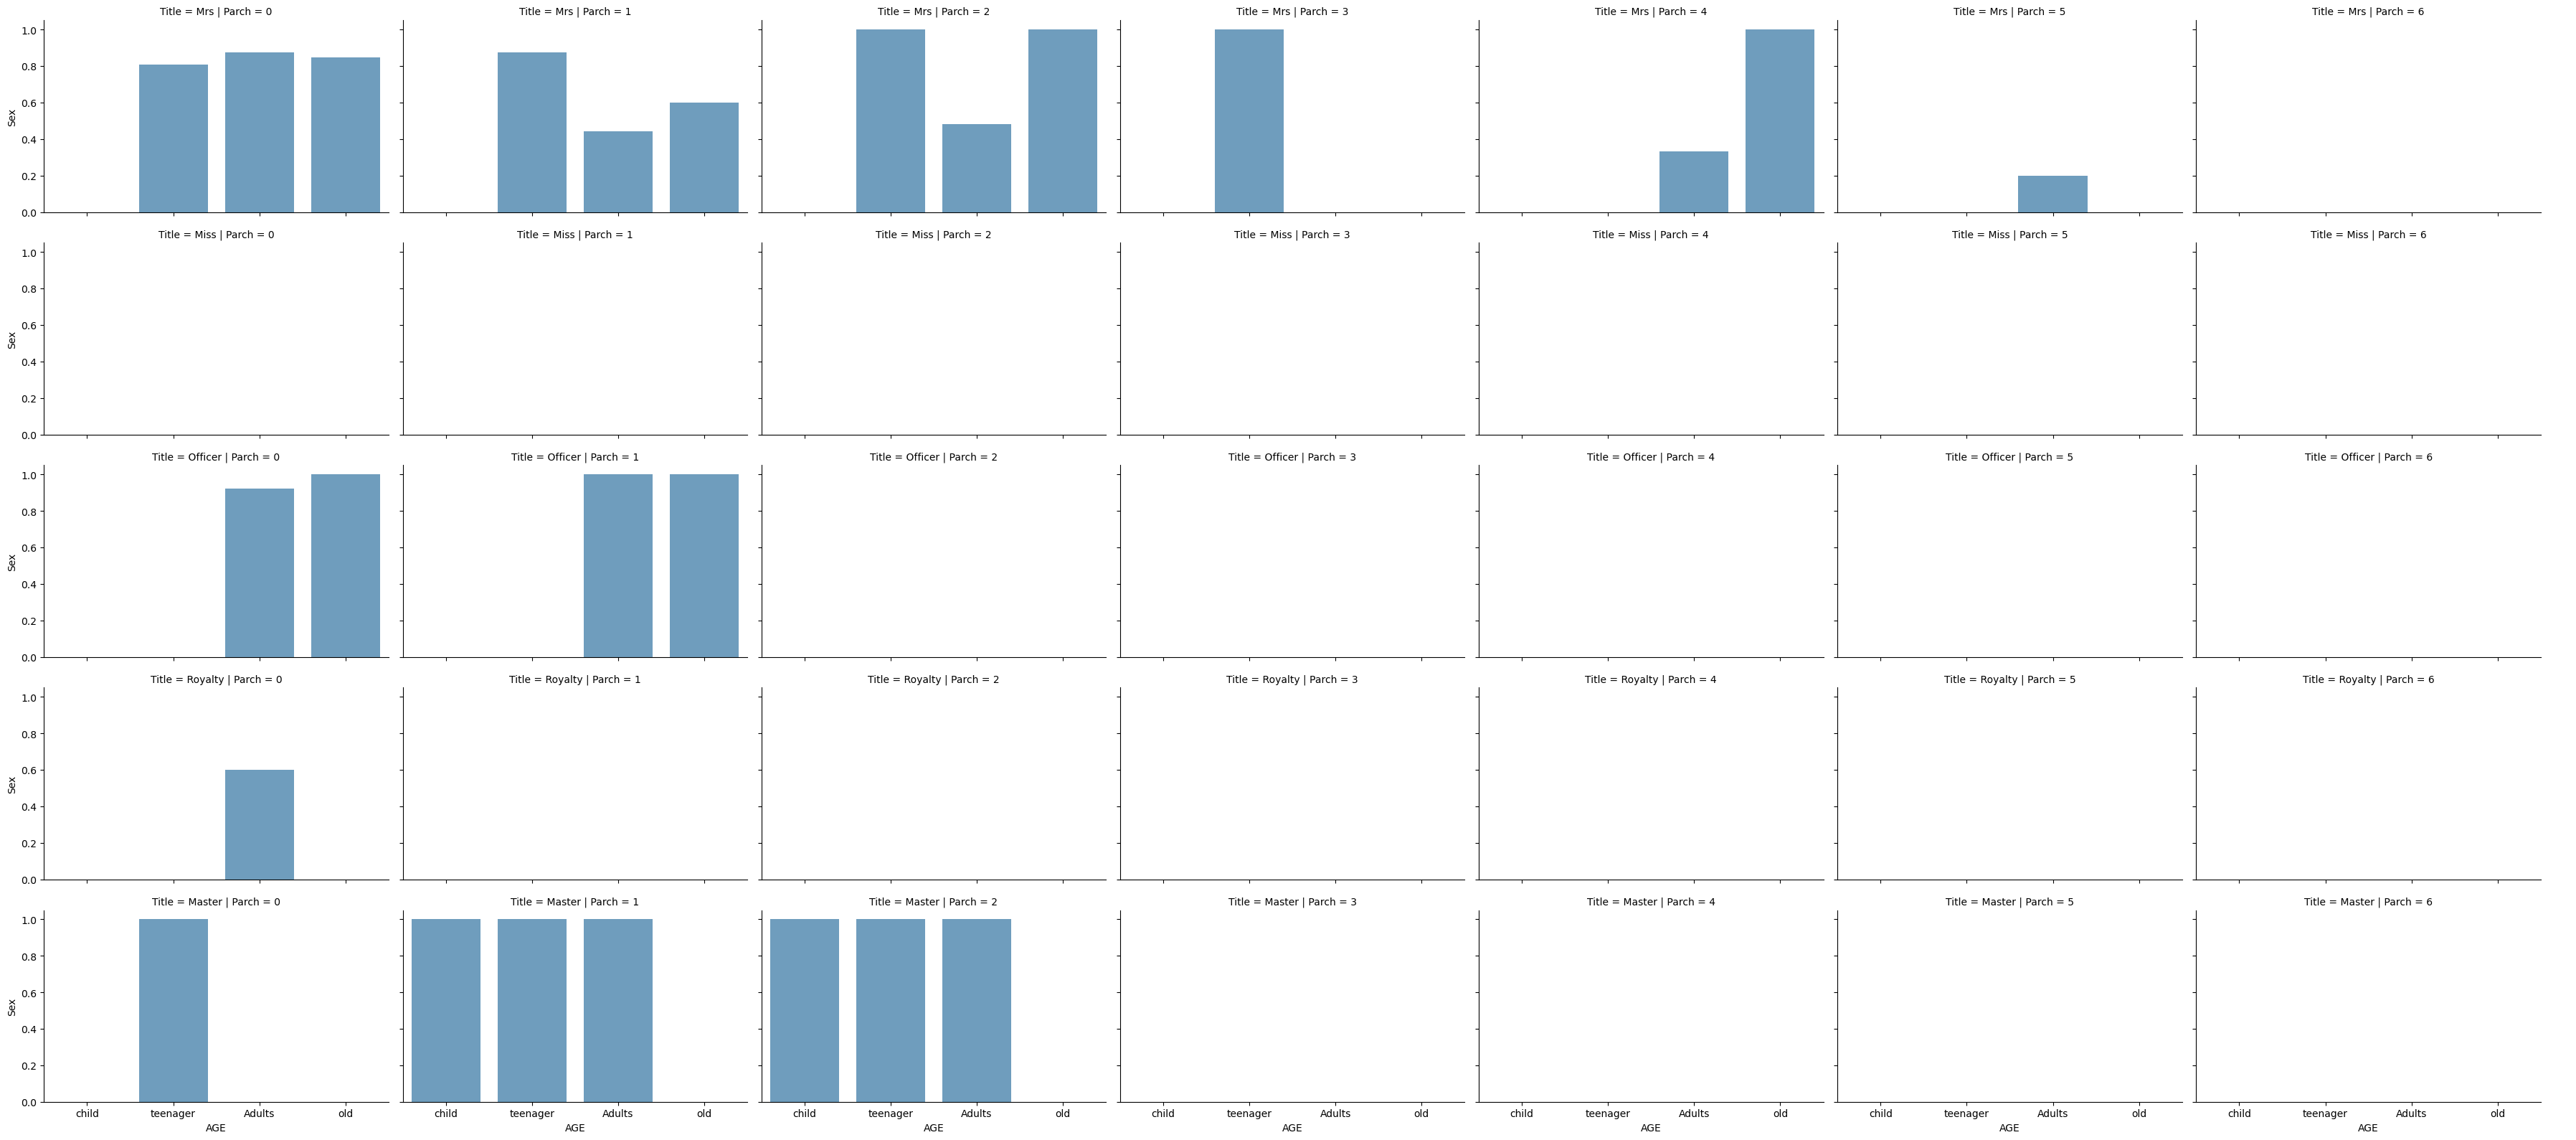

In [97]:
grid = sns.FacetGrid(Titanic,row = "Title" ,col = "Parch", height = 3.2, aspect =1.6)
grid.map(sns.barplot,"AGE","Sex", alpha =.7,ci = None ,order = None)
grid.add_legend();

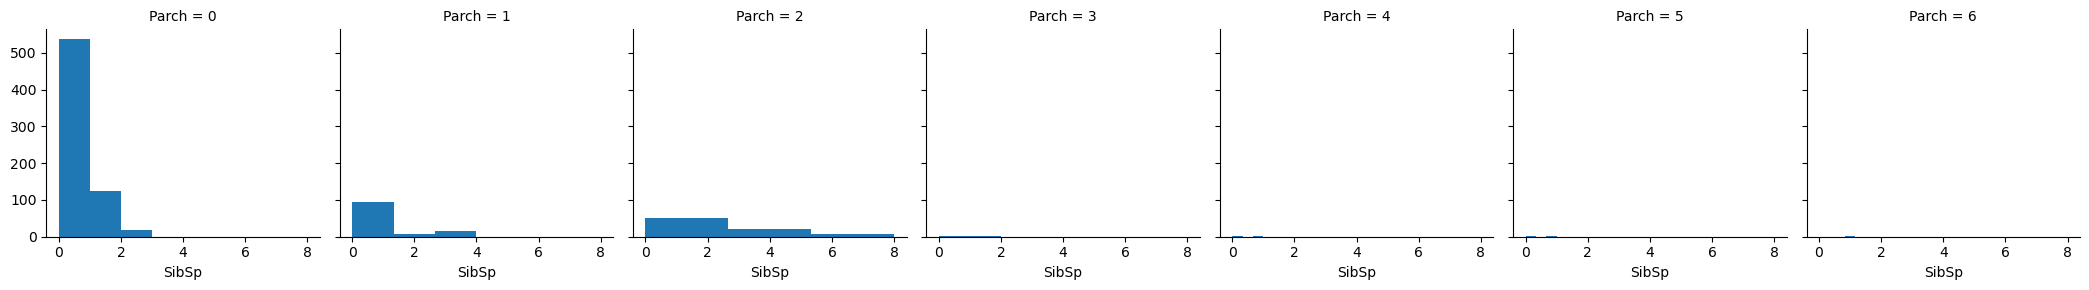

In [98]:
# sibsp	# of siblings / spouses aboard the Titanic	
# parch	# of parents / children aboard the Titanic
g = sns.FacetGrid(Titanic, col='Parch')
g.map(plt.hist,"SibSp",bins=3);

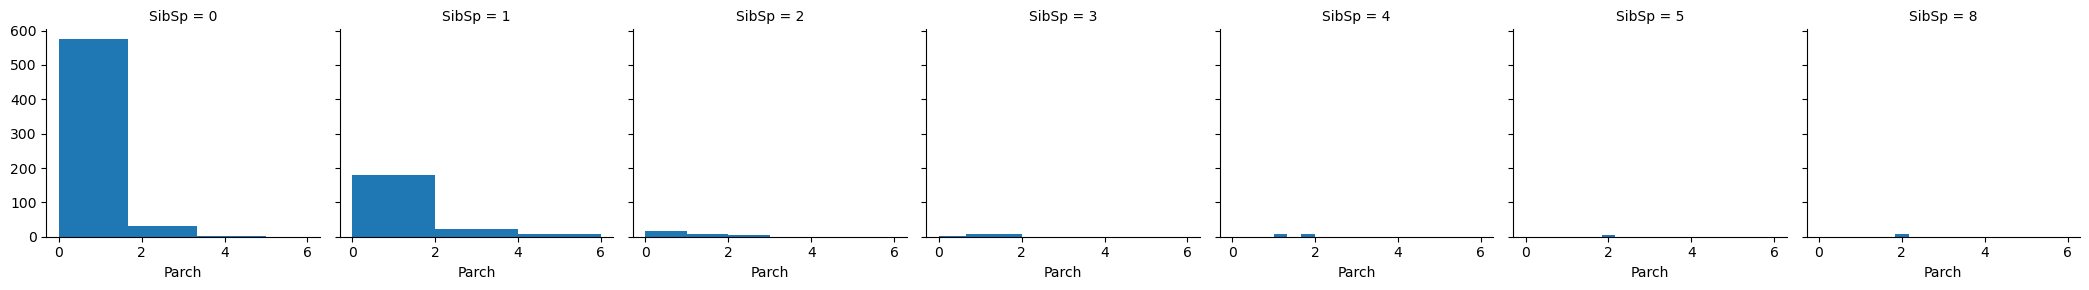

In [99]:
g = sns.FacetGrid(Titanic, col='SibSp')
g.map(plt.hist,"Parch",bins=3);

In [100]:
Titanic.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [101]:
Titanic.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [102]:
Titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AGE
0,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,2,Mrs,Adults
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,2,Mrs,Adults
2,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,2,Mrs,Adults
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,2,Mrs,Adults
4,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,2,Mrs,Adults


In [103]:
New_data2 = Titanic.drop(["Survived", "Pclass","Name", "Sex","Age","Fare","AGE","Title","Embarked"], axis =1)
New_data2

,SibSp,Parch
0,0,0
1,0,0
2,0,0
3,0,4
4,1,0
...,...,...
886,1,0
887,0,0
888,0,0
889,0,0


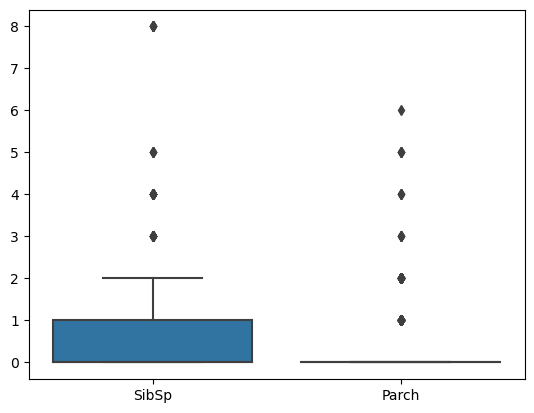

In [106]:
sns.boxplot(data = New_data2);

In [107]:
Titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AGE
0,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,2,Mrs,Adults
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,2,Mrs,Adults
2,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,2,Mrs,Adults
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,2,Mrs,Adults
4,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,2,Mrs,Adults


In [108]:
Titanic["FamilySize"] = Titanic["SibSp"] + Titanic["Parch"]
Titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AGE,FamilySize
0,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,2,Mrs,Adults,0
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,2,Mrs,Adults,0
2,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,2,Mrs,Adults,0
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,2,Mrs,Adults,4
4,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,2,Mrs,Adults,1


In [109]:
# After Analyzing the Dataset, may it make more Since to remove SibSp and Parch, because we create FamilySize as a Sum of them
# We Already took the useful Information from Name --> we can delete Name Also
# Since Fare is Proportional with Pclass, we can remove one of them
# Because we Divide Age in Interval "AGE", we can also remove Age

Titanic.drop(["Name","Age","SibSp","Parch","Fare",],axis = 1 ,inplace = True)
Titanic.head()

,Survived,Pclass,Sex,Embarked,Title,AGE,FamilySize
0,0,2,1,2,Mrs,Adults,0
1,0,3,1,2,Mrs,Adults,0
2,0,3,1,2,Mrs,Adults,0
3,0,3,0,2,Mrs,Adults,4
4,0,1,1,2,Mrs,Adults,1


In [111]:
# Export Data as CSV File
Titanic.to_csv("data/Titanic_Dataset.csv")
DATA =pd.read_csv("data/Titanic_Dataset.csv")
DATA.head()

,Unnamed: 0,Survived,Pclass,Sex,Embarked,Title,AGE,FamilySize
0,0,0,2,1,2,Mrs,Adults,0
1,1,0,3,1,2,Mrs,Adults,0
2,2,0,3,1,2,Mrs,Adults,0
3,3,0,3,0,2,Mrs,Adults,4
4,4,0,1,1,2,Mrs,Adults,1
